In [6]:
#Read in the necessary libraries
import pandas as pd
import numpy as np
import itertools

#Matplotlib section
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

#SKLearn and Scipy Models
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Import for the creation and visualization of decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.metrics import make_scorer

#Import for random forest modeling
from sklearn.ensemble import RandomForestClassifier

In [9]:
import xgboost as xgb

#This code prevents the kernel from stopping when XGBoost is running
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/Alex/miniconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/Alex/miniconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [10]:
#Run this cell to hide warnings about package updates
import warnings
warnings.filterwarnings('ignore')

In [11]:
#I import pickle to save certain models
import pickle

In [12]:
#A function that takes in a model and a string with the model name and saves it to the repository
def make_pickle(model, model_name):
    model_pickle_path = 'Classification_Models_After_'+ model_name + '.pkl'
    # Create a variable to pickle and open it in write mode
    model_pickle = open(model_pickle_path, 'wb')
    pickle.dump(model, model_pickle)
    model_pickle.close()

In [13]:
#Read in the csv file containing the datafreame
election_df = pd.read_csv('updated_data/congressional_data_and_targets.csv')

## 1. Create the Boolean Target Variable

The data cleansing process was completed in the notebook titled "Census_Data_API_Work.ipynb"

In [14]:
#Creates a boolean column based on whether the district voted more for the Republican party or not (i.e. Democratic party/ Independent candidate)
election_df['Target_Presidential_R_bool'] = (election_df['Target_Presidential_R'] > election_df['Target_Presidential_D']).astype(int)


In [15]:
election_df.shape

(804, 54)

In [16]:
#Reorganize the dataframe so the target variable is on the right side and the identification cells are on the left
election_df = election_df[['CD_Id_Year', 'District_Name', 'State', 'Total_Pop', 'Total_Males', 'Total_Females', 'Median_Age', 'Total_Children', 'Total_White_People', 'Total_Afr_Am_People', 'Total_American_Ind_Alk_Ntv', 'Total_Asian', 'Total_Mexican_Origin', 'Total_Puerto_Rican_Origin', 'Total_Cuban_Origin', 'Total_Dominican_Origin', 'Total_Native_US', 'Total_Non_Citizens', 'Total_Foreign_Born', 'Median_Income', 'Median_Household_Income', 'Below_Poverty_Level_LTM', 'Total_Wealthy_Households', 'Gini_Index', 'Total_Less_Highschool', 'Total_Bachelor_Holders', 'Total_STEM', 'Total_Business_Degree', 'Total_Married_Households', 'Total_Veterans', 'Total_Labor_Force_Eligible', 'Total_Employed', 'Total_Unemployed', 'Median_Age_Of_Worker', 'Total_Workers', 'Total_Working_Agricult', 'Total_Working_Construction', 'Total_Working_Manufacturing', 'Total_Working_Retail', 'Total_Working_Transportation', 'Total_Working_Information', 'Total_Working_Finance', 'Total_Working_Education', 'Total_Working_Health', 'Total_Working_Food', 'Total_Working_Public_Admin', 'Median_Gross_Rent', 'Target_Presidential_R_bool']]

## 2. EDA

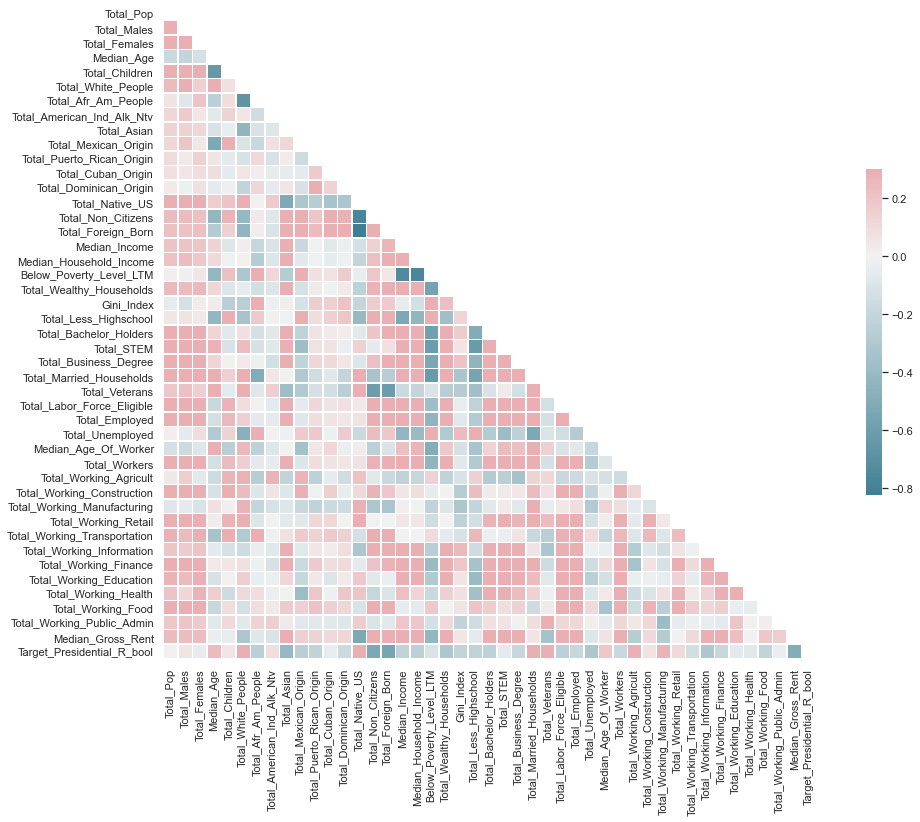

In [17]:
#This cell creates a correlation matrix to view the correlation between continuous features
#and the target variable
sns.set(style="white")

# Compute the correlation matrix
corr = election_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

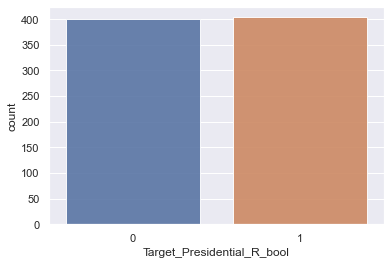

In [18]:
#A histogram of the target variable
sns.set_style('darkgrid')
sns.countplot(election_df['Target_Presidential_R_bool'], alpha=0.9)
#There is a negligible imbalance

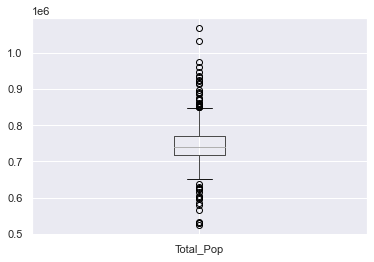

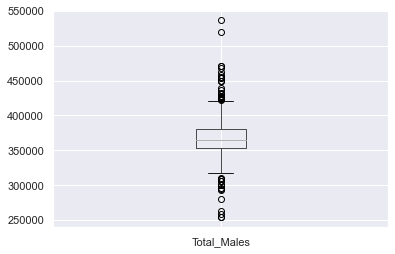

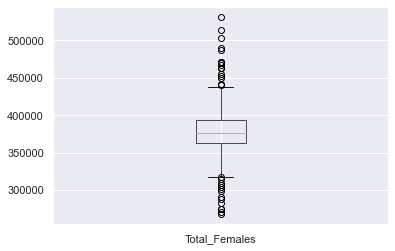

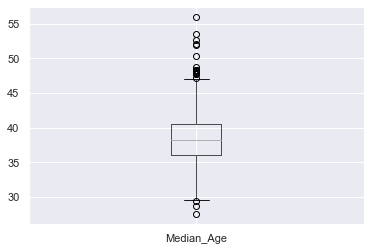

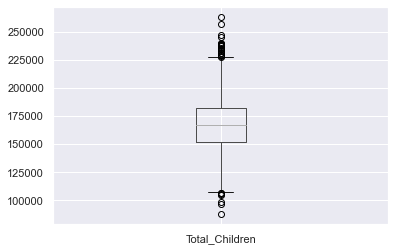

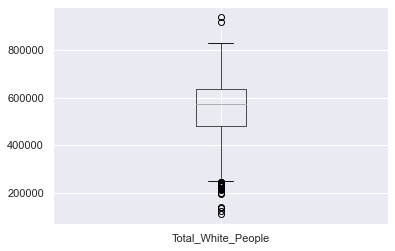

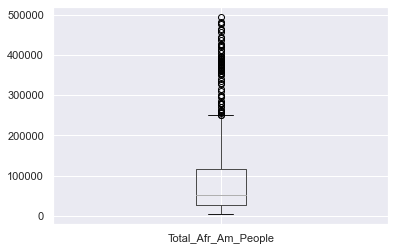

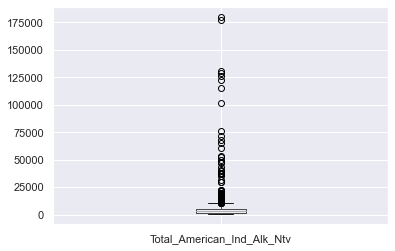

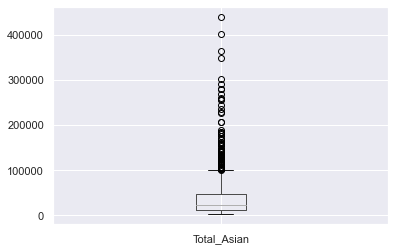

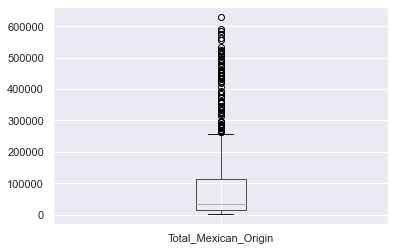

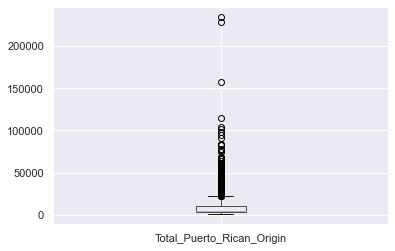

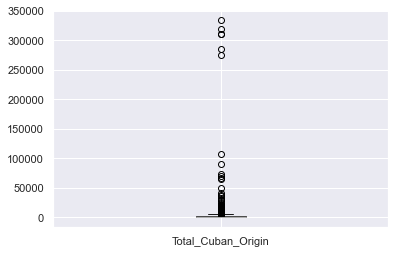

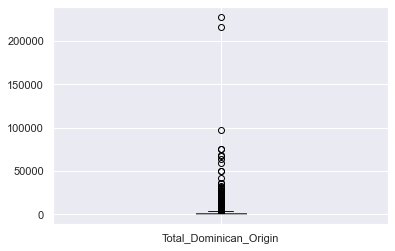

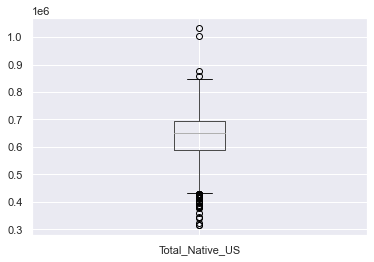

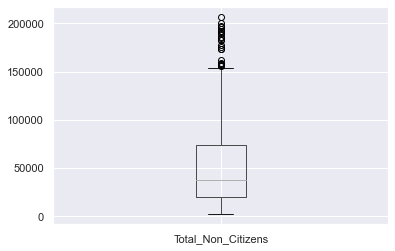

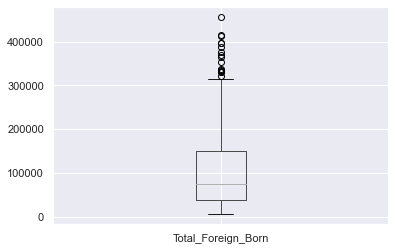

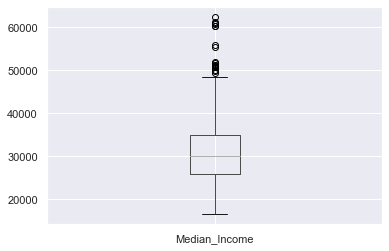

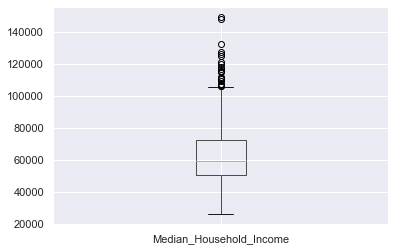

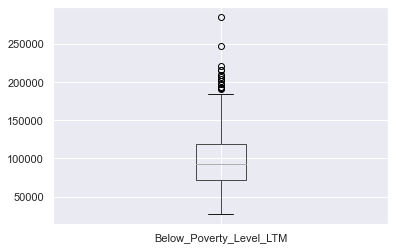

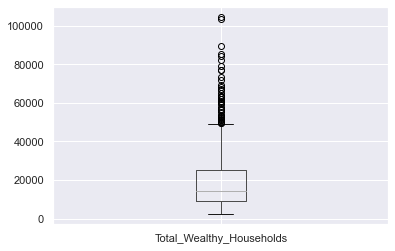

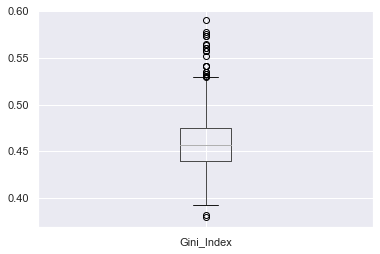

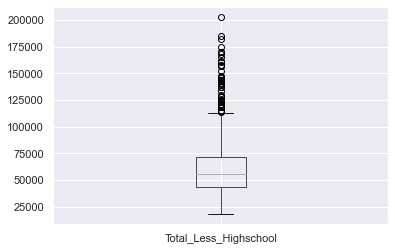

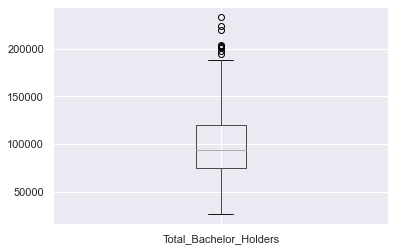

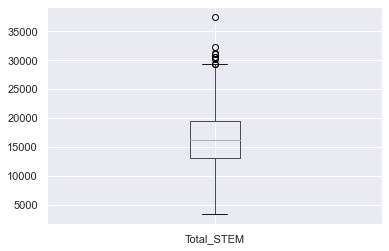

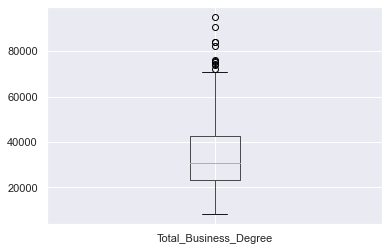

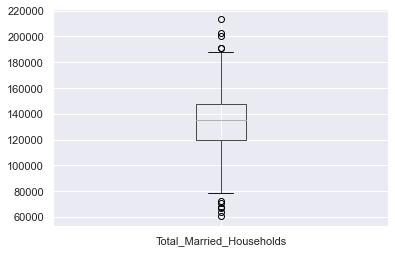

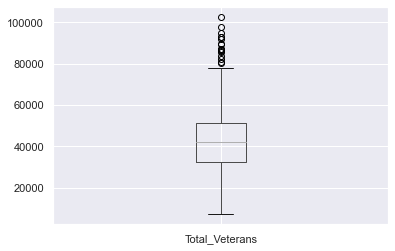

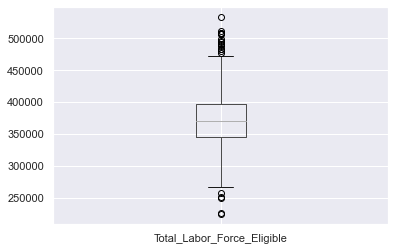

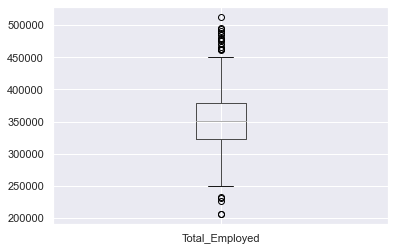

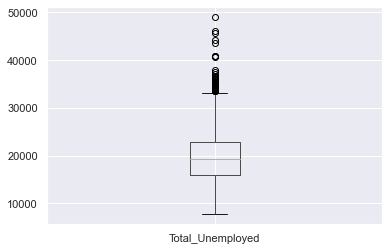

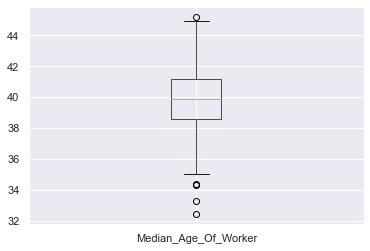

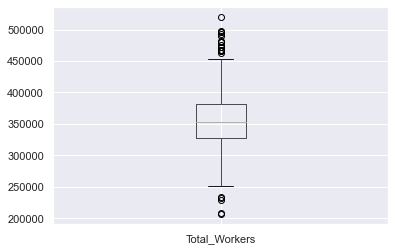

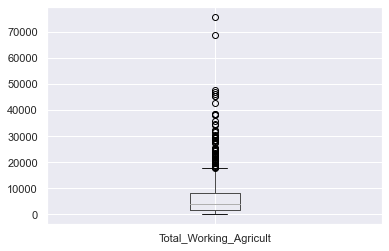

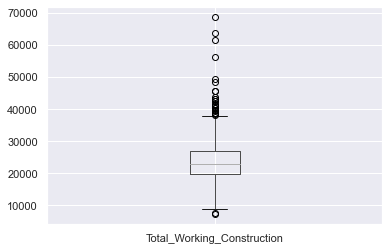

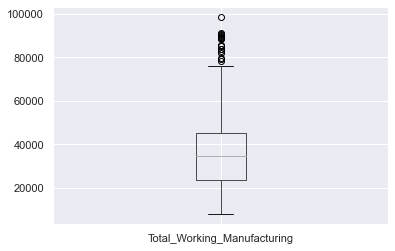

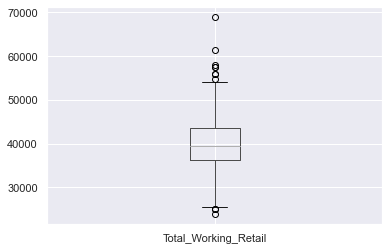

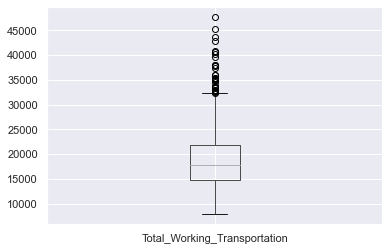

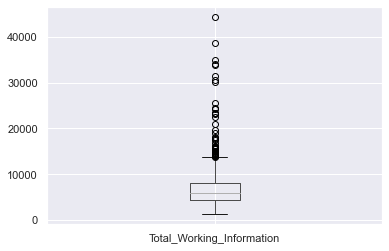

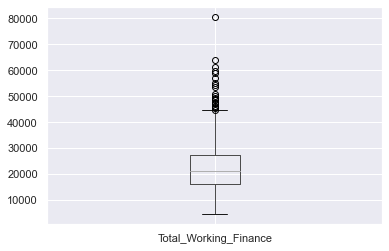

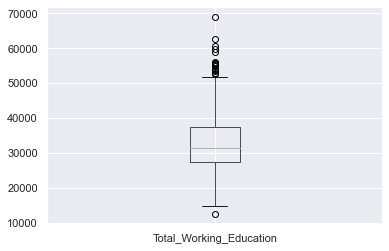

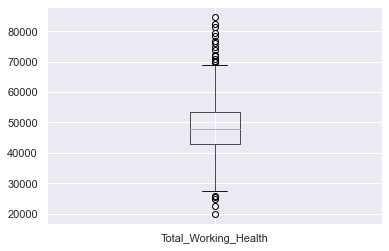

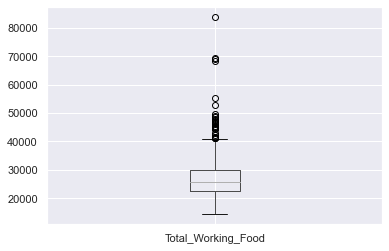

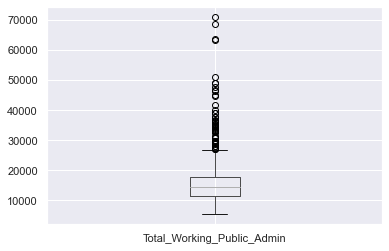

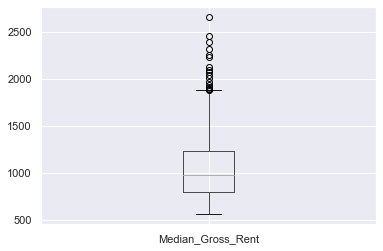

In [19]:
#Boxplots of all continuous variables as individual graphs
for i in election_df.columns[3:-1]:
    election_df.boxplot(column=i)
    plt.show()

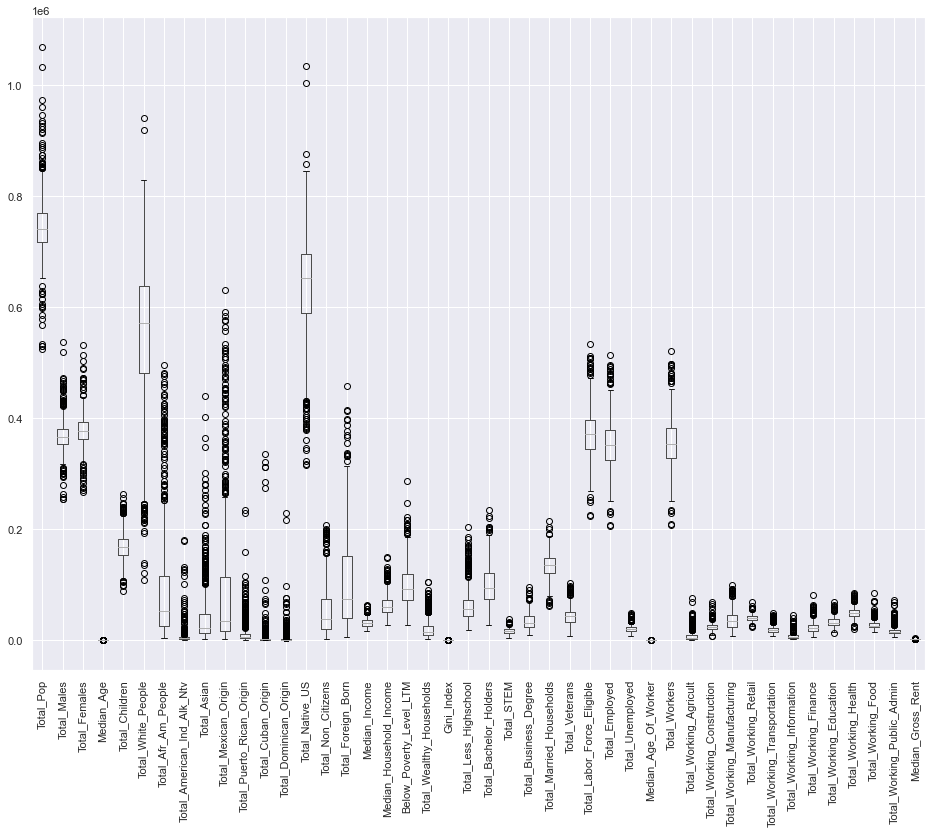

In [20]:
#A Boxplot of all continuous variables in one graph
election_df[['CD_Id_Year', 'District_Name', 'State', 'Total_Pop', 'Total_Males', 'Total_Females', 'Median_Age', 'Total_Children', 'Total_White_People', 'Total_Afr_Am_People', 'Total_American_Ind_Alk_Ntv', 'Total_Asian', 'Total_Mexican_Origin', 'Total_Puerto_Rican_Origin', 'Total_Cuban_Origin', 'Total_Dominican_Origin', 'Total_Native_US', 'Total_Non_Citizens', 'Total_Foreign_Born', 'Median_Income', 'Median_Household_Income', 'Below_Poverty_Level_LTM', 'Total_Wealthy_Households', 'Gini_Index', 'Total_Less_Highschool', 'Total_Bachelor_Holders', 'Total_STEM', 'Total_Business_Degree', 'Total_Married_Households', 'Total_Veterans', 'Total_Labor_Force_Eligible', 'Total_Employed', 'Total_Unemployed', 'Median_Age_Of_Worker', 'Total_Workers', 'Total_Working_Agricult', 'Total_Working_Construction', 'Total_Working_Manufacturing', 'Total_Working_Retail', 'Total_Working_Transportation', 'Total_Working_Information', 'Total_Working_Finance', 'Total_Working_Education', 'Total_Working_Health', 'Total_Working_Food', 'Total_Working_Public_Admin', 'Median_Gross_Rent']].boxplot(figsize = (16,12), rot= 90)

## 3. Feature Engineering

In [21]:
election_df.describe()

Total_Pop    Total_Males  Total_Females  Median_Age  Total_Children  \
count  8.040000e+02     804.000000     804.000000  804.000000      804.000000   
mean   7.466858e+05  367827.646766  378858.186567   38.372761   169345.966418   
std    5.332107e+04   27298.236632   27737.082779    3.711363    25954.358552   
min    5.237410e+05  253674.000000  267332.000000   27.500000    87464.000000   
25%    7.176530e+05  353222.000000  362832.500000   36.100000   152251.500000   
50%    7.410345e+05  364936.500000  376176.000000   38.200000   166839.000000   
75%    7.702305e+05  380232.250000  393222.750000   40.500000   182391.250000   
max    1.068778e+06  537170.000000  531608.000000   56.000000   263364.000000   

       Total_White_People  Total_Afr_Am_People  Total_American_Ind_Alk_Ntv  \
count          804.000000           804.000000                  804.000000   
mean        543699.912935         92014.589552                 6546.079602   
std         127621.087458        101141.428655                15567.032769   
min         108156.000000          3730.000000                  195.000000   
25%         481601.250000         25874.000000                 1675.750000   
50%         570768.500000         52923.500000                 2904.000000   
75%         637527.000000        115900.250000                 5264.250000   
max         940423.000000        494566.000000               180019.000000   

         Total_Asian  Total_Mexican_Origin  ...  Total_Working_Retail  \
count     804.000000            804.000000  ...            804.000000   
mean    41601.274876          89479.240050  ...          39893.497512   
std     52246.304646         121152.048806  ...           5708.261284   
min      2235.000000            904.000000  ...          23814.000000   
25%     12170.250000          15855.750000  ...          36206.500000   
50%     22340.500000          33819.500000  ...          39456.000000   
75%     47335.000000         112623.750000  ...          43536.750000   
max    439547.000000         630333.000000  ...          69014.000000   

       Total_Working_Transportation  Total_Working_Information  \
count                    804.000000                 804.000000   
mean                   18997.184080                6967.060945   
std                     5928.560813                4483.561393   
min                     7838.000000                1205.000000   
25%                    14833.750000                4303.750000   
50%                    17862.000000                5791.000000   
75%                    21816.500000                8109.250000   
max                    47733.000000               44444.000000   

       Total_Working_Finance  Total_Working_Education  Total_Working_Health  \
count             804.000000               804.000000            804.000000   
mean            22991.623134             32592.481343          48525.524876   
std              9375.616388              7643.917343           8593.275744   
min              4452.000000             12376.000000          19790.000000   
25%             16024.750000             27435.250000          42823.250000   
50%             21122.500000             31341.000000          48003.500000   
75%             27521.500000             37345.500000          53461.250000   
max             80628.000000             69003.000000          84767.000000   

       Total_Working_Food  Total_Working_Public_Admin  Median_Gross_Rent  \
count          804.000000                  804.000000         804.000000   
mean         26916.460199                15979.069652        1056.809701   
std           6952.916301                 7477.454513         324.855768   
min          14266.000000                 5364.000000         558.000000   
25%          22500.500000                11556.000000         800.750000   
50%          25521.000000                14369.000000         975.000000   
75%          29928.750000                17679.500000        1235.250000   
max 

In [22]:
#In this cell I turn subsets of the total population into percentages of the
#population and  workforce/labor force

#Identify columns to divide by population segemnts

to_divide_by_total_pop = ['Total_Males', 'Total_Females', 'Total_Veterans', 'Total_White_People', 'Total_Afr_Am_People', 'Total_Asian', 'Total_American_Ind_Alk_Ntv', 'Total_Cuban_Origin', 'Total_Puerto_Rican_Origin', 'Total_Dominican_Origin', 'Total_Mexican_Origin', 'Total_Native_US', 'Total_Non_Citizens', 'Total_Foreign_Born', 'Total_Children', 'Total_Married_Households', 'Total_Less_Highschool', 'Total_Bachelor_Holders', 'Total_STEM', 'Total_Business_Degree', 'Total_Labor_Force_Eligible', 'Below_Poverty_Level_LTM', 'Total_Workers']
to_divide_by_total_labor_force_eligible = ['Total_Employed', 'Total_Unemployed']
to_divide_by_total_workers = ['Total_Working_Agricult', 'Total_Working_Construction', 'Total_Working_Manufacturing', 'Total_Working_Retail', 'Total_Working_Transportation', 'Total_Working_Finance', 'Total_Working_Education', 'Total_Working_Health', 'Total_Working_Food', 'Total_Working_Public_Admin', 'Total_Working_Information']

#Normalize the data by making certain columns a percentage of one of the three main population groups

election_df[to_divide_by_total_workers] = election_df[to_divide_by_total_workers].div(election_df['Total_Workers'], axis=0)
election_df[to_divide_by_total_labor_force_eligible] = election_df[to_divide_by_total_labor_force_eligible].div(election_df['Total_Labor_Force_Eligible'], axis=0)
election_df[to_divide_by_total_pop] = election_df[to_divide_by_total_pop].div(election_df['Total_Pop'], axis=0)

In [23]:
#I create a second dataframe made of my engineered features and compare the results of
#each dataframe
election_df_feature_engineering = election_df.copy()
election_df_feature_engineering.columns

Index(['CD_Id_Year', 'District_Name', 'State', 'Total_Pop', 'Total_Males',
       'Total_Females', 'Median_Age', 'Total_Children', 'Total_White_People',
       'Total_Afr_Am_People', 'Total_American_Ind_Alk_Ntv', 'Total_Asian',
       'Total_Mexican_Origin', 'Total_Puerto_Rican_Origin',
       'Total_Cuban_Origin', 'Total_Dominican_Origin', 'Total_Native_US',
       'Total_Non_Citizens', 'Total_Foreign_Born', 'Median_Income',
       'Median_Household_Income', 'Below_Poverty_Level_LTM',
       'Total_Wealthy_Households', 'Gini_Index', 'Total_Less_Highschool',
       'Total_Bachelor_Holders', 'Total_STEM', 'Total_Business_Degree',
       'Total_Married_Households', 'Total_Veterans',
       'Total_Labor_Force_Eligible', 'Total_Employed', 'Total_Unemployed',
       'Median_Age_Of_Worker', 'Total_Workers', 'Total_Working_Agricult',
       'Total_Working_Construction', 'Total_Working_Manufacturing',
       'Total_Working_Retail', 'Total_Working_Transportation',
       'Total_Working_Informat

In [24]:
#Create booleans if more than ten percent of a district's labor force work in a specific industry
election_df_feature_engineering['Ten_Percent_Manufacturing'] = np.where(election_df_feature_engineering['Total_Working_Manufacturing']>=0.1, 1, 0)
print(election_df_feature_engineering.Ten_Percent_Manufacturing.value_counts())

election_df_feature_engineering['Ten_Percent_Agricult'] = np.where(election_df_feature_engineering['Total_Working_Agricult']>=0.1, 1, 0)
print(election_df_feature_engineering.Ten_Percent_Agricult.value_counts())

election_df_feature_engineering['Ten_Percent_Construction'] = np.where(election_df_feature_engineering['Total_Working_Construction']>=0.1, 1, 0)
print(election_df_feature_engineering.Ten_Percent_Construction.value_counts())

election_df_feature_engineering['Ten_Percent_Retail'] = np.where(election_df_feature_engineering['Total_Working_Retail']>=0.1, 1, 0)
print(election_df_feature_engineering.Ten_Percent_Retail.value_counts())

election_df_feature_engineering['Ten_Percent_Information'] = np.where(election_df_feature_engineering['Total_Working_Information']>=0.1, 1, 0)
print(election_df_feature_engineering.Ten_Percent_Information.value_counts())

election_df_feature_engineering['Ten_Percent_Transportation'] = np.where(election_df_feature_engineering['Total_Working_Transportation']>=0.1, 1, 0)
print(election_df_feature_engineering.Ten_Percent_Transportation.value_counts())

election_df_feature_engineering['Ten_Percent_Finance'] = np.where(election_df_feature_engineering['Total_Working_Finance']>=0.1, 1, 0)
print(election_df_feature_engineering.Ten_Percent_Finance.value_counts())

election_df_feature_engineering['Ten_Percent_Education'] = np.where(election_df_feature_engineering['Total_Working_Education']>=0.1, 1, 0)
print(election_df_feature_engineering.Ten_Percent_Education.value_counts())

election_df_feature_engineering['Ten_Percent_Health'] = np.where(election_df_feature_engineering['Total_Working_Health']>=0.1, 1, 0)
print(election_df_feature_engineering.Ten_Percent_Health.value_counts())

election_df_feature_engineering['Ten_Percent_Food'] = np.where(election_df_feature_engineering['Total_Working_Food']>=0.1, 1, 0)
print(election_df_feature_engineering.Ten_Percent_Food.value_counts())


#Drops the columns that the above booleans were derived from
election_df_feature_engineering.drop(['Total_Working_Agricult',
       'Total_Working_Construction', 'Total_Working_Manufacturing',
       'Total_Working_Retail', 'Total_Working_Transportation',
       'Total_Working_Information', 'Total_Working_Finance',
       'Total_Working_Education', 'Total_Working_Health', 'Total_Working_Food',
       'Total_Working_Public_Admin'], axis=1)


0    427
1    377
Name: Ten_Percent_Manufacturing, dtype: int64
0    792
1     12
Name: Ten_Percent_Agricult, dtype: int64
0    774
1     30
Name: Ten_Percent_Construction, dtype: int64
1    673
0    131
Name: Ten_Percent_Retail, dtype: int64
0    803
1      1
Name: Ten_Percent_Information, dtype: int64
0    792
1     12
Name: Ten_Percent_Transportation, dtype: int64
0    755
1     49
Name: Ten_Percent_Finance, dtype: int64
0    570
1    234
Name: Ten_Percent_Education, dtype: int64
1    768
0     36
Name: Ten_Percent_Health, dtype: int64
0    746
1     58
Name: Ten_Percent_Food, dtype: int64


CD_Id_Year                                      District_Name State  \
0    MD-08-2016  Congressional District 8 (114th Congress), Mar...    MD   
1    MA-01-2016  Congressional District 1 (114th Congress), Mas...    MA   
2    MA-02-2016  Congressional District 2 (114th Congress), Mas...    MA   
3    MA-03-2016  Congressional District 3 (114th Congress), Mas...    MA   
4    MA-04-2016  Congressional District 4 (114th Congress), Mas...    MA   
..          ...                                                ...   ...   
799  WI-05-2020  Congressional District 5 (116th Congress), Wis...    WI   
800  WI-06-2020  Congressional District 6 (116th Congress), Wis...    WI   
801  WI-07-2020  Congressional District 7 (116th Congress), Wis...    WI   
802  WI-08-2020  Congressional District 8 (116th Congress), Wis...    WI   
803  WY-AL-2020  Congressional District (at Large) (116th Congr...    WY   

     Total_Pop  Total_Males  Total_Females  Median_Age  Total_Children  \
0       761778     0.483474       0.516526        40.0        0.222494   
1       736190     0.481931       0.518069        41.0        0.208301   
2       744886     0.488617       0.511383        39.1        0.201184   
3       754068     0.493592       0.506408        39.0        0.231373   
4       750331     0.486244       0.513756        40.9        0.228126   
..         ...          ...            ...         ...             ...   
799     733314     0.493493       0.506507        42.5        0.203622   
800     715828     0.499929       0.500071        42.0        0.209514   
801     714544     0.504396       0.495604        45.0        0.212901   
802     736079     0.499152       0.500848        40.8        0.222214   
803     578759     0.511448       0.488552        38.1        0.231856   

     Total_White_People  Total_Afr_Am_People  ...  Ten_Percent_Manufacturing  \
0              0.664476             0.120504  ...                          0   
1              0.851639             0.062718  ...                          1   
2              0.839923             0.053289  ...                          1   
3              0.778707             0.034130  ...                          1   
4              0.870159             0.028529  ...                          0   
..                  ...                  ...  ...                        ...   
799            0.904964             0.024388  ...                          1   
800            0.916085             0.019580  ...                          1   
801            0.931979             0.008040  ...                          1   
802            0.889944             0.016547  ...                          1   
803            0.908599             0.012295  ...                          0   

     Ten_Percent_Agricult  Ten_Percent_Construction  Ten_Percent_Retail  \
0                       0                         0                   0   
1                       0                         0                   1   
2                       0                         0                   1   
3                       0                         0                   0   
4                       0                         0                   1   
..                    ...                       ...                 ...   
799                     0                         0                   1   
800                     0                         0                   1   
801                     0                         0                   1   
802                     0                         0                   1   
803                     1                         0                   1   

     Ten_Percent_Information  Ten_Percent_Transportation  Ten_Percent_Finance  \
0                          0                           0                    0   
1                          0                           0                    0   
2                          0                           0                    0   
3                

In [25]:
#Drop the original columns that the threshold columns were created from
election_df_feature_engineering = election_df_feature_engineering.drop(['Total_Working_Agricult',
       'Total_Working_Construction', 'Total_Working_Manufacturing',
       'Total_Working_Retail', 'Total_Working_Transportation',
       'Total_Working_Information', 'Total_Working_Finance',
       'Total_Working_Education', 'Total_Working_Health', 'Total_Working_Food',
       'Total_Working_Public_Admin'], axis=1)

#Drop the information boolean column because no district contains more than ten
#percent of the labor force working in that field
election_df_feature_engineering = election_df_feature_engineering.drop(['Ten_Percent_Information'], axis=1)

In [26]:
election_df_feature_engineering.columns

Index(['CD_Id_Year', 'District_Name', 'State', 'Total_Pop', 'Total_Males',
       'Total_Females', 'Median_Age', 'Total_Children', 'Total_White_People',
       'Total_Afr_Am_People', 'Total_American_Ind_Alk_Ntv', 'Total_Asian',
       'Total_Mexican_Origin', 'Total_Puerto_Rican_Origin',
       'Total_Cuban_Origin', 'Total_Dominican_Origin', 'Total_Native_US',
       'Total_Non_Citizens', 'Total_Foreign_Born', 'Median_Income',
       'Median_Household_Income', 'Below_Poverty_Level_LTM',
       'Total_Wealthy_Households', 'Gini_Index', 'Total_Less_Highschool',
       'Total_Bachelor_Holders', 'Total_STEM', 'Total_Business_Degree',
       'Total_Married_Households', 'Total_Veterans',
       'Total_Labor_Force_Eligible', 'Total_Employed', 'Total_Unemployed',
       'Median_Age_Of_Worker', 'Total_Workers', 'Median_Gross_Rent',
       'Target_Presidential_R_bool', 'Ten_Percent_Manufacturing',
       'Ten_Percent_Agricult', 'Ten_Percent_Construction',
       'Ten_Percent_Retail', 'Ten_Percent

In [27]:
#Reorganize the second dataframe
election_df_feature_engineering = election_df_feature_engineering[['CD_Id_Year', 'District_Name', 'State', 'Total_Pop', 'Total_Males',
       'Total_Females', 'Median_Age', 'Total_Children', 'Total_White_People',
       'Total_Afr_Am_People', 'Total_American_Ind_Alk_Ntv', 'Total_Asian',
       'Total_Mexican_Origin', 'Total_Puerto_Rican_Origin',
       'Total_Cuban_Origin', 'Total_Dominican_Origin', 'Total_Native_US',
       'Total_Non_Citizens', 'Total_Foreign_Born', 'Median_Income',
       'Median_Household_Income', 'Below_Poverty_Level_LTM',
       'Total_Wealthy_Households', 'Gini_Index', 'Total_Less_Highschool',
       'Total_Bachelor_Holders', 'Total_STEM', 'Total_Business_Degree',
       'Total_Married_Households', 'Total_Veterans',
       'Total_Labor_Force_Eligible', 'Total_Employed', 'Total_Unemployed',
       'Median_Age_Of_Worker', 'Total_Workers', 'Ten_Percent_Manufacturing',
       'Ten_Percent_Agricult', 'Ten_Percent_Construction',
       'Ten_Percent_Retail', 'Ten_Percent_Transportation',
       'Ten_Percent_Finance', 'Ten_Percent_Education', 'Ten_Percent_Health',
       'Ten_Percent_Food', 'Median_Gross_Rent', 'Target_Presidential_R_bool']]

## 4. A Function To Plot The Confusion Matrix

In [28]:
#This function will be used to create confusion matrices for each model where appropriate
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    classes = ['Did Not Vote Republican', 'Voted Republican']
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix')

    figure(figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': 22})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 5. Initial Regression - Without Feature Engineering

In [29]:
#This is an initial logistic regression of all dependent variables using Scikit learn
#Using the dataframe without feature engineering

#Split data to be used in the models between the target variable and features

# X will take every dependent variable but the target and other index variables
X_log_model_1 = election_df.drop(['Target_Presidential_R_bool','CD_Id_Year', 'District_Name', 'State'], axis = 1) 

#y will hold the target variable
y_log_model_1 = election_df['Target_Presidential_R_bool'] # y is the column we're trying to predict

In [30]:
#Split the data into a train and test set
X_train_log_model_1, X_test_log_model_1, y_train_log_model_1, y_test_log_model_1 = train_test_split(X_log_model_1, y_log_model_1, random_state=1)


sc_log_model_1=StandardScaler()
X_train_scaled_log_model_1 = sc_log_model_1.fit_transform(X_train_log_model_1)
X_test_scaled_log_model_1 = sc_log_model_1.transform(X_test_log_model_1)


In [31]:
#Fit the model and view the coefficients
log_model_1 = LogisticRegression(C=1e9)
log_model_1.fit(X_train_scaled_log_model_1, y_train_log_model_1)
zip(X_train_log_model_1.columns, log_model_1.coef_[0])
log_model_1.coef_

array([[ 2.60817243e-01,  3.20280704e-01, -3.20280704e-01,
         3.29956444e-01,  1.48146792e+00,  2.94480008e+00,
         1.72175858e+00,  3.55448722e-01,  1.82369839e+00,
        -7.69317773e-01,  1.52600458e+00,  5.56382176e-01,
         7.10437965e-01,  1.83864393e+01, -1.54735878e+00,
         1.74355075e+01, -6.80668843e-01, -3.42562137e+00,
        -2.25754131e+00,  2.03618841e+00,  6.30680512e-03,
        -9.18859660e-01, -2.75401735e+00, -2.13574785e-01,
         2.30223822e+00,  1.38482135e+00,  1.36491972e-01,
         3.53950916e+00,  8.18068501e-01, -8.18068501e-01,
        -1.04196426e+00, -5.54414993e+00,  9.58595772e-01,
         8.92457024e-01,  2.32565368e-01,  6.30458217e-01,
         4.58463792e-01,  4.57752859e-01,  3.85184196e-01,
         9.81179164e-01, -3.80239311e-01,  3.49293186e-01,
         2.44414892e-01, -2.08227562e-01]])

In [32]:
#Makes predictions on the train and test set
y_pred_class_log_model_1_train = log_model_1.predict(X_train_scaled_log_model_1)


#Calculate the model's accuracy and f1
print("The training accuracy is: " + str(metrics.accuracy_score(y_train_log_model_1, y_pred_class_log_model_1_train)))

print("The training f1 score is: " + str(metrics.f1_score(y_train_log_model_1, y_pred_class_log_model_1_train)))

The training accuracy is: 0.9286898839137645
The training f1 score is: 0.9296235679214402


In [33]:
#Class predictions on the test set (not predicted probabilities)
y_pred_class_log_model_1 = log_model_1.predict(X_test_scaled_log_model_1)

#Calculates the model's accuracy and f1
print("The testing accuracy is: " + str(metrics.accuracy_score(y_test_log_model_1, y_pred_class_log_model_1)))

print("The testing f1 score is: " + str(metrics.f1_score(y_test_log_model_1, y_pred_class_log_model_1)))

The testing accuracy is: 0.8656716417910447
The testing f1 score is: 0.8629441624365481


In [34]:
#Save confusion matrix and slice into four pieces
confusion_log_model_1 = metrics.confusion_matrix(y_test_log_model_1, y_pred_class_log_model_1)
TP_log_model_1 = confusion_log_model_1[1][1]
TN_log_model_1 = confusion_log_model_1[0][0]
FP_log_model_1 = confusion_log_model_1[0][1]
FN_log_model_1 = confusion_log_model_1[1][0]

print('Log Model 1 Confusion Matrix:')
print ('True Positives:', TP_log_model_1)
print ('True Negatives:', TN_log_model_1)
print ('False Positives:', FP_log_model_1)
print ('False Negatives:', FN_log_model_1)

Log Model 1 Confusion Matrix:
True Positives: 85
True Negatives: 89
False Positives: 13
False Negatives: 14


Confusion Matrix


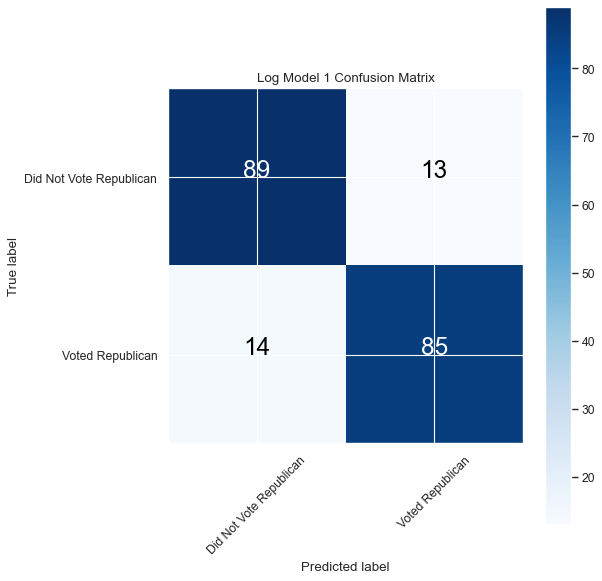

In [35]:
#Plot the confusion matrix
plot_confusion_matrix(confusion_log_model_1,
                          normalize=False,
                          title='Log Model 1 Confusion Matrix',
                          cmap=plt.cm.Blues)

## 6. Initial Regression - With Feature Engineering

In [36]:
#This is an initial logistic regression of all dependent variables using Scikit learn
#using the dataframe with feature engineering

#Split data to be used in the models between the target variable and features

# X will take every dependent variable but the target and other index variables
X_log_model_2 = election_df_feature_engineering.drop(['Target_Presidential_R_bool','CD_Id_Year', 'District_Name','State'], axis = 1) 

# Create target variable
y_log_model_2 = election_df_feature_engineering['Target_Presidential_R_bool'] # y is the column we're trying to predict

In [37]:
#Split the data into a train and test set
X_train_log_model_2, X_test_log_model_2, y_train_log_model_2, y_test_log_model_2 = train_test_split(X_log_model_2, y_log_model_2, random_state=1)


sc_log_model_2=StandardScaler()
X_train_scaled_log_model_2 = sc_log_model_2.fit_transform(X_train_log_model_2)
X_test_scaled_log_model_2 = sc_log_model_2.transform(X_test_log_model_2)


In [38]:
#Fit the model and view the coefficients
log_model_2 = LogisticRegression(C=1e9)
log_model_2.fit(X_train_scaled_log_model_2, y_train_log_model_2)
zip(X_train_log_model_2.columns, log_model_2.coef_[0])
log_model_2.coef_

array([[ 5.77630434e-01,  3.37221328e-01, -3.37221328e-01,
        -5.33098593e-01,  6.69554012e-01,  2.35316516e+00,
         1.48318708e+00,  2.76723168e-01,  1.11904106e+00,
        -6.57034369e-01,  1.30947041e+00,  5.28869859e-01,
         5.72347388e-01,  1.73266812e+01, -7.05915883e-01,
         1.58389929e+01, -7.94309198e-01, -3.16566395e-01,
        -1.49282486e+00, -4.92176934e-01,  5.11548211e-01,
        -5.55904548e-01, -2.40225689e+00, -4.29994620e-01,
         1.72015919e+00,  1.79255301e+00,  2.13906841e-02,
        -1.48837201e+00,  4.60102365e-01, -4.60102365e-01,
        -4.88454190e-01, -3.09899575e-01, -4.95664471e-01,
         6.22642388e-02,  8.08017175e-02,  3.78264741e-01,
         1.21923971e-03,  2.89901537e-01,  6.55651856e-02,
        -2.09504385e-01,  2.50951869e-02, -1.15615572e-01]])

In [39]:
#Makes predictions on the train and test set
y_pred_class_log_model_2_train = log_model_2.predict(X_train_scaled_log_model_2)


#Calculate the model's accuracy and f1 score
print("The training accuracy is: ", metrics.accuracy_score(y_train_log_model_2, y_pred_class_log_model_2_train))

print("The training f1 score is: ", metrics.f1_score(y_train_log_model_2, y_pred_class_log_model_2_train))

The training accuracy is:  0.9270315091210614
The training f1 score is:  0.9285714285714286


In [40]:
#Class predictions on the test set (not predicted probabilities)
y_pred_class_log_model_2 = log_model_2.predict(X_test_scaled_log_model_2)

#Calculate the model's accuracy and f1 score
print("The testing accuracy is: ", metrics.accuracy_score(y_test_log_model_2, y_pred_class_log_model_2))

print("The testing f1 score is: ", metrics.f1_score(y_test_log_model_2, y_pred_class_log_model_2))

The testing accuracy is:  0.8706467661691543
The testing f1 score is:  0.8712871287128712


In [41]:
#Save confusion matrix and slice into four pieces
confusion_log_model_2 = metrics.confusion_matrix(y_test_log_model_2, y_pred_class_log_model_2)
TP_log_model_2 = confusion_log_model_1[1][1]
TN_log_model_2 = confusion_log_model_1[0][0]
FP_log_model_2 = confusion_log_model_1[0][1]
FN_log_model_2 = confusion_log_model_1[1][0]

print('Log Model 2 Confusion Matrix:')
print ('True Positives:', TP_log_model_2)
print ('True Negatives:', TN_log_model_2)
print ('False Positives:', FP_log_model_2)
print ('False Negatives:', FN_log_model_2)

Log Model 2 Confusion Matrix:
True Positives: 85
True Negatives: 89
False Positives: 13
False Negatives: 14


Confusion Matrix


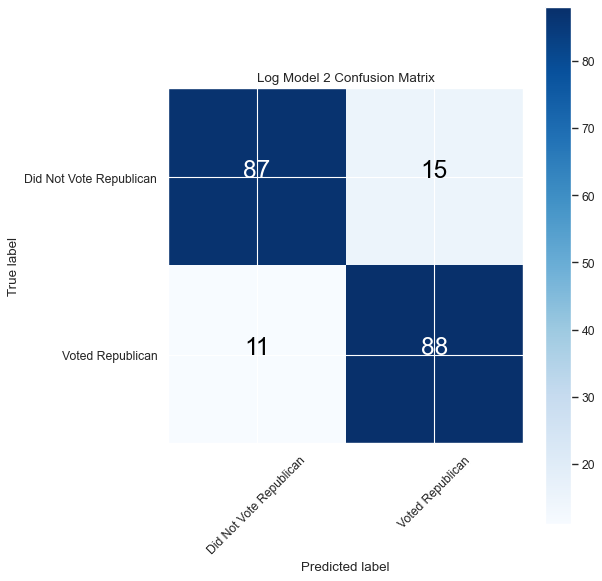

In [42]:
#Plot the confusion Matrix
plot_confusion_matrix(confusion_log_model_2,
                          normalize=False,
                          title='Log Model 2 Confusion Matrix',
                          cmap=plt.cm.Blues)

## 7. Logistic Model Grid Search

In [43]:
#The following is a function that resets the data for future use
def reset_data(df_to_use = None):
    
    if df_to_use == 'engineered':
        
        df = election_df_feature_engineering
        
        features_list = ['Total_Pop', 'Total_Males',
                         'Total_Females', 'Median_Age', 'Total_Children', 'Total_White_People',
                         'Total_Afr_Am_People', 'Total_American_Ind_Alk_Ntv', 'Total_Asian',
                         'Total_Mexican_Origin', 'Total_Puerto_Rican_Origin',
                         'Total_Cuban_Origin', 'Total_Dominican_Origin', 'Total_Native_US',
                         'Total_Non_Citizens', 'Total_Foreign_Born', 'Median_Income',
                         'Median_Household_Income', 'Below_Poverty_Level_LTM',
                         'Total_Wealthy_Households', 'Gini_Index', 'Total_Less_Highschool',
                         'Total_Bachelor_Holders', 'Total_STEM', 'Total_Business_Degree',
                         'Total_Married_Households', 'Total_Veterans',
                         'Total_Labor_Force_Eligible', 'Total_Employed', 'Total_Unemployed',
                         'Median_Age_Of_Worker', 'Total_Workers', 'Ten_Percent_Manufacturing',
                         'Ten_Percent_Agricult', 'Ten_Percent_Construction',
                         'Ten_Percent_Retail', 'Ten_Percent_Transportation',
                         'Ten_Percent_Finance', 'Ten_Percent_Education', 'Ten_Percent_Health',
                         'Ten_Percent_Food', 'Median_Gross_Rent']
    else:
        
        df = election_df
        
        features_list = ['Total_Pop', 'Total_Males',
                         'Total_Females', 'Median_Age', 'Total_Children', 'Total_White_People',
                         'Total_Afr_Am_People', 'Total_American_Ind_Alk_Ntv', 'Total_Asian',
                         'Total_Mexican_Origin', 'Total_Puerto_Rican_Origin', 'Total_Cuban_Origin',
                         'Total_Dominican_Origin', 'Total_Native_US', 'Total_Non_Citizens',
                         'Total_Foreign_Born', 'Median_Income', 'Median_Household_Income',
                         'Below_Poverty_Level_LTM', 'Total_Wealthy_Households', 'Gini_Index',
                         'Total_Less_Highschool', 'Total_Bachelor_Holders', 'Total_STEM',
                         'Total_Business_Degree', 'Total_Married_Households', 'Total_Veterans',
                         'Total_Labor_Force_Eligible', 'Total_Employed', 'Total_Unemployed',
                         'Median_Age_Of_Worker', 'Total_Workers', 'Total_Working_Agricult',
                         'Total_Working_Construction', 'Total_Working_Manufacturing',
                         'Total_Working_Retail', 'Total_Working_Transportation',
                         'Total_Working_Information', 'Total_Working_Finance', 
                         'Total_Working_Education', 'Total_Working_Health', 'Total_Working_Food',
                         'Total_Working_Public_Admin', 'Median_Gross_Rent']
    
    y = df.Target_Presidential_R_bool
    X = df[features_list]
    
    return train_test_split(X, y, random_state=1, test_size = 0.2)


In [44]:
#Splits the data for the logistic model gridsearch, using the standard features
X_train_log_model_3, X_test_log_model_3, y_train_log_model_3, y_test_log_model_3 =  reset_data()

sc_log_model_3=StandardScaler()
X_train_scaled_log_model_3= sc_log_model_3.fit_transform(X_train_log_model_3)
X_test_scaled_log_model_3 = sc_log_model_3.transform(X_test_log_model_3)

In [45]:
# Creates logistic regression model
log_model_3 = linear_model.LogisticRegression()

In [46]:
# Creates regularization penalty parameters
penalty = ['l1', 'l2']

# Creates regularization hyperparameters
C = C_param_range = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10]

# Creates hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [47]:
# Creates a grid search using 5-fold cross validation
clf_gs_log_model_3 = GridSearchCV(log_model_3, hyperparameters, cv=5, scoring= "f1") 

In [48]:
# Fits grid search to the training data
log_model_3 = clf_gs_log_model_3.fit(X_train_scaled_log_model_3, y_train_log_model_3) 

In [49]:
# View best hyperparameters
print('Best Penalty:', log_model_3.best_estimator_.get_params()['penalty'])
print('Best C:', log_model_3.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.5


In [50]:
#Make predictions for scoring purposes
y_pred_train_log_model_3 = log_model_3.best_estimator_.predict(X_train_scaled_log_model_3)

y_pred_test_log_model_3 = log_model_3.best_estimator_.predict(X_test_scaled_log_model_3)

# Model accuracy and f1 scores
print("Training Accuracy for Log Model 3 (GS Standard Features):", metrics.accuracy_score(y_train_log_model_3, y_pred_train_log_model_3))
print("Training F1 Score for Log Model 3 (GS Standard Features):", metrics.f1_score(y_train_log_model_3, y_pred_train_log_model_3))
print("")
print("Testing Accuracy for Log Model 3 (GS Standard Features):", metrics.accuracy_score(y_test_log_model_3, y_pred_test_log_model_3))
print("Testing F1 Score for Log Model 3 (GS Standard Features):", metrics.f1_score(y_test_log_model_3, y_pred_test_log_model_3))

Training Accuracy for Log Model 3 (GS Standard Features): 0.9160186625194401
Training F1 Score for Log Model 3 (GS Standard Features): 0.9171779141104295

Testing Accuracy for Log Model 3 (GS Standard Features): 0.8944099378881988
Testing F1 Score for Log Model 3 (GS Standard Features): 0.89171974522293


In [51]:
# Sorts feature importances in descending order and displays the top 10

model_params_log_model_3 = list(zip(list(X_train_log_model_3.columns), log_model_3.best_estimator_.coef_[0]))

model_params_log_model_3.sort(key = lambda x: abs(x[1]), reverse=True)
model_params_log_model_3[:10]

[('Total_Married_Households', 1.2199171947514094),
 ('Total_Bachelor_Holders', -1.0706525979779076),
 ('Total_Mexican_Origin', -0.9792889825265854),
 ('Total_Business_Degree', 0.9327601705755213),
 ('Below_Poverty_Level_LTM', -0.8531964017204642),
 ('Total_White_People', 0.7816478440553493),
 ('Total_Non_Citizens', -0.6988050882147535),
 ('Total_Children', 0.6895227717190986),
 ('Total_Labor_Force_Eligible', -0.6775003693729432),
 ('Total_Workers', -0.590873097891284)]

<Figure size 432x288 with 0 Axes>

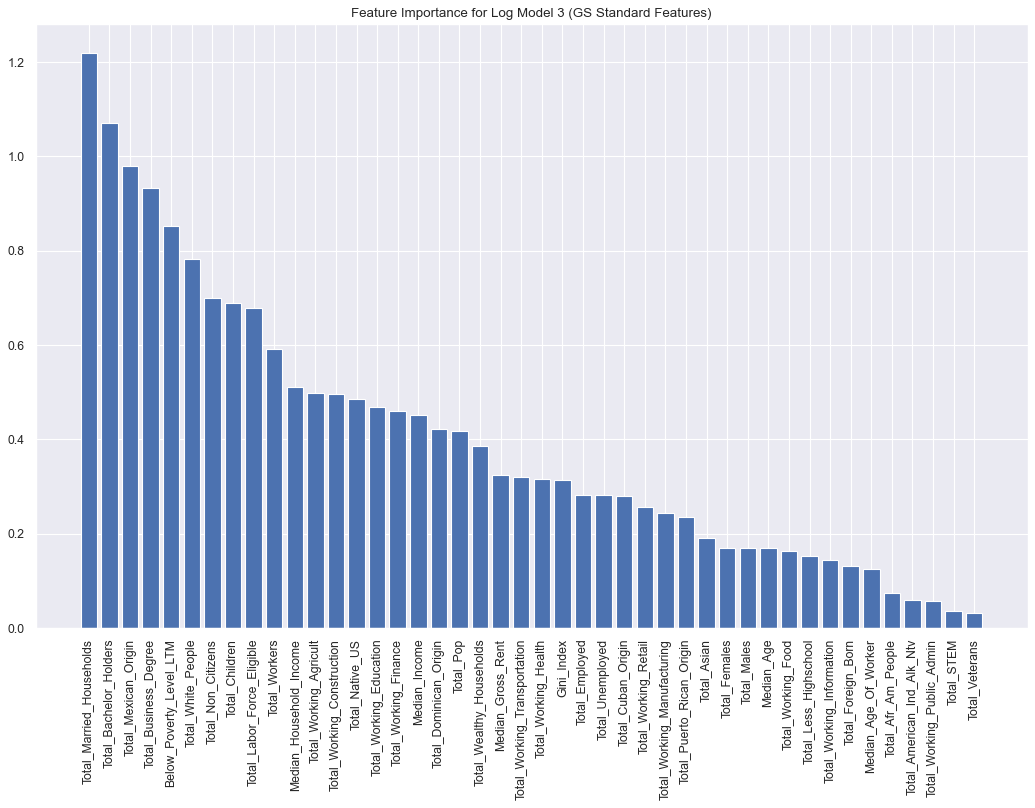

In [52]:
#Plots the parameter importance

# Rearrange feature names so they match the sorted feature importances
model_features_log_model_3 = [i[0] for i in model_params_log_model_3]

feature_weights_log_model_3 = [abs(i[1]) for i in model_params_log_model_3]

# Creates the plot

plt.figure()
figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
# Creates the plot title
plt.title("Feature Importance for Log Model 3 (GS Standard Features)")

# Add bars
plt.bar(model_features_log_model_3, feature_weights_log_model_3)

# Add feature names as x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.show()

In [53]:
# View confusion matrix and slice into four pieces

confusion_log_model_3 = metrics.confusion_matrix(y_test_log_model_3, y_pred_test_log_model_3)
TP_log_model_3 = confusion_log_model_3[1][1]
TN_log_model_3 = confusion_log_model_3[0][0]
FP_log_model_3 = confusion_log_model_3[0][1]
FN_log_model_3 = confusion_log_model_3[1][0]

print('Log Model 3 Confusion Matrix:')
print ('True Positives:', TP_log_model_3)
print ('True Negatives:', TN_log_model_3)
print ('False Positives:', FP_log_model_3)
print ('False Negatives:', FN_log_model_3)

Log Model 3 Confusion Matrix:
True Positives: 70
True Negatives: 74
False Positives: 6
False Negatives: 11


Confusion Matrix


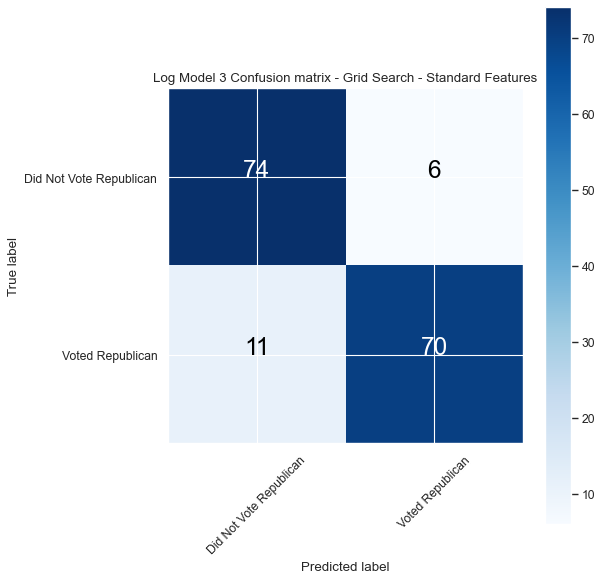

In [54]:
#Plots the confusion matrix visualization
confusion_log_model_3 = metrics.confusion_matrix(y_test_log_model_3, y_pred_test_log_model_3)

plot_confusion_matrix(confusion_log_model_3, title='Log Model 3 Confusion matrix - Grid Search - Standard Features')


## 8. Logistic Model Grid Search With Engineered Features

In [55]:
#Splits the data for the logistic model gridsearch, using the engineered features
X_train_log_model_4, X_test_log_model_4, y_train_log_model_4, y_test_log_model_4 =  reset_data('engineered')

sc_log_model_4=StandardScaler()
X_train_scaled_log_model_4= sc_log_model_4.fit_transform(X_train_log_model_4)
X_test_scaled_log_model_4 = sc_log_model_4.transform(X_test_log_model_4)

# Create logistic regression model
log_model_4 = linear_model.LogisticRegression()

# Create grid search using 5-fold cross validation, same parameters as before
clf_gs_log_model_4 = GridSearchCV(log_model_4, hyperparameters, cv=5, scoring= "f1") 

# Fit grid search
log_model_4 = clf_gs_log_model_4.fit(X_train_scaled_log_model_4, y_train_log_model_4)



In [56]:
# View best hyperparameters
print('Best Penalty:', log_model_4.best_estimator_.get_params()['penalty'])
print('Best C:', log_model_4.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


In [57]:
#Make predictions for scoring purposes

y_pred_train_log_model_4 = log_model_4.best_estimator_.predict(X_train_scaled_log_model_4)

y_pred_test_log_model_4 = log_model_4.best_estimator_.predict(X_test_scaled_log_model_4)

# Model accuracy and f1 scores
print("Training Accuracy for Log Model 4 (GS Engineered Features):", metrics.accuracy_score(y_train_log_model_4, y_pred_train_log_model_4))
print("Training F1 Score for Log Model 4 (GS Engineered Features):", metrics.f1_score(y_train_log_model_4, y_pred_train_log_model_4))
print("")
print("Testing Accuracy for Log Model 4 (GS Engineered Features):", metrics.accuracy_score(y_test_log_model_4, y_pred_test_log_model_4))
print("Testing F1 Score for Log Model 4 (GS Engineered Features):", metrics.f1_score(y_test_log_model_4, y_pred_test_log_model_4))

Training Accuracy for Log Model 4 (GS Engineered Features): 0.9020217729393468
Training F1 Score for Log Model 4 (GS Engineered Features): 0.9035222052067382

Testing Accuracy for Log Model 4 (GS Engineered Features): 0.8571428571428571
Testing F1 Score for Log Model 4 (GS Engineered Features): 0.8571428571428572


In [58]:
# Sorts feature importances in descending order and displays the top 10

model_params_log_model_4 = list(zip(list(X_train_log_model_4.columns), log_model_4.best_estimator_.coef_[0]))

model_params_log_model_4.sort(key = lambda x: abs(x[1]), reverse=True)
model_params_log_model_4[:10]

[('Total_Married_Households', 0.8996166912819443),
 ('Total_Mexican_Origin', -0.6084943335447933),
 ('Total_Labor_Force_Eligible', -0.5522173831989585),
 ('Total_Children', 0.5188907376239913),
 ('Total_Bachelor_Holders', -0.45923835309695854),
 ('Total_Workers', -0.4328300880811498),
 ('Total_White_People', 0.41157711469408076),
 ('Below_Poverty_Level_LTM', -0.4113053896156236),
 ('Total_Non_Citizens', -0.3997778877025876),
 ('Total_Native_US', 0.38344179881202634)]

<Figure size 432x288 with 0 Axes>

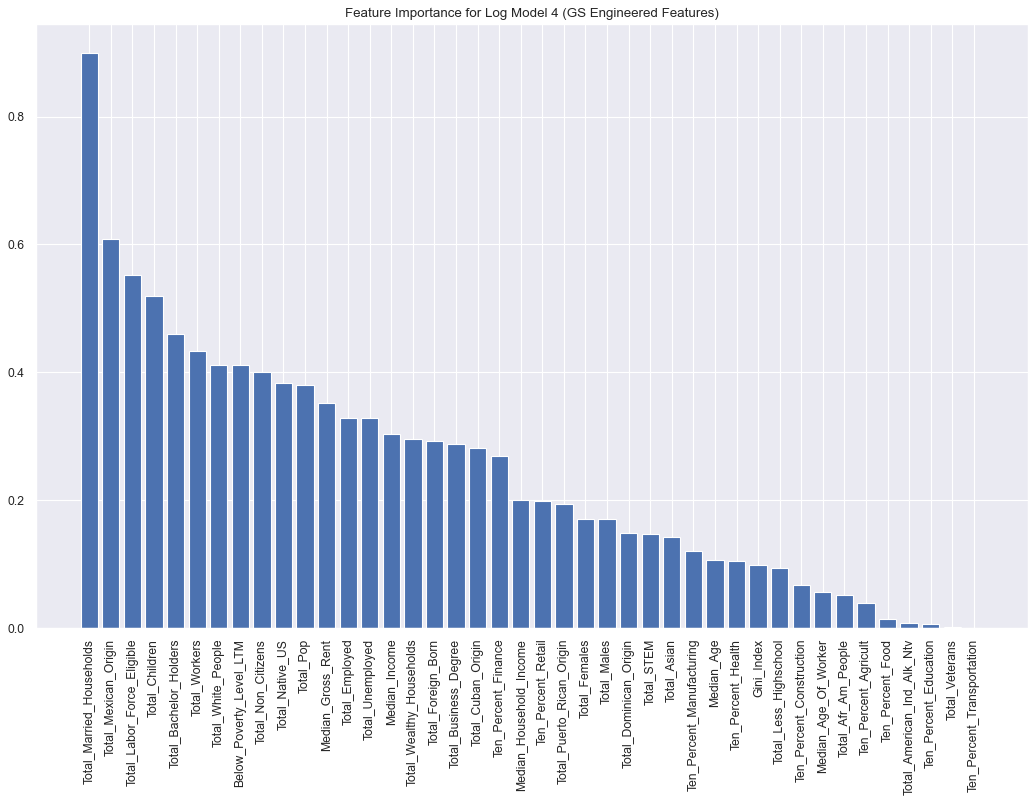

In [59]:
#Plot the parameter importance

# Rearrange feature names so they match the sorted feature importances
model_features_log_model_4 = [i[0] for i in model_params_log_model_4]

feature_weights_log_model_4 = [abs(i[1]) for i in model_params_log_model_4]

# Create plot

plt.figure()
figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
# Create plot title
plt.title("Feature Importance for Log Model 4 (GS Engineered Features)")

# Add bars
plt.bar(model_features_log_model_4, feature_weights_log_model_4)

# Add feature names as x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.show()

Confusion Matrix


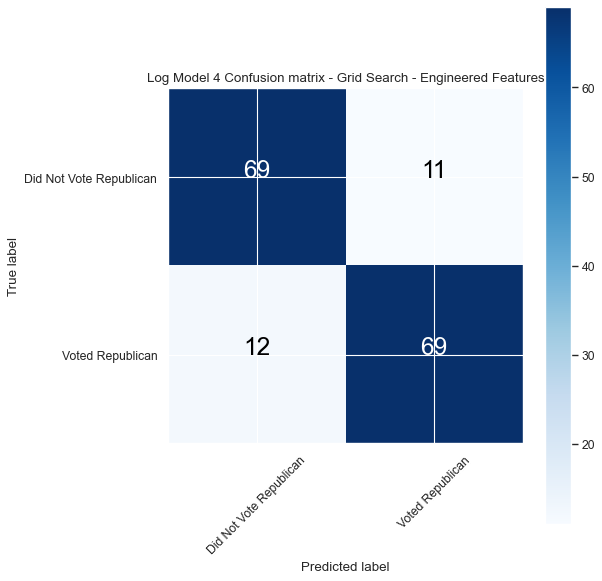

In [60]:
#View the confusion matrix
confusion_log_model_4 = metrics.confusion_matrix(y_test_log_model_4, y_pred_test_log_model_4)
plot_confusion_matrix(confusion_log_model_4, title='Log Model 4 Confusion matrix - Grid Search - Engineered Features')

## 9. Logistic Model Grid Search On The Standard Set- With Polynomials

In [61]:
#Create a pipeline for a polynomial grid search
pipe_lr_poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
            ('scl', StandardScaler()),
            ('clf', LogisticRegression(random_state=42))])

In [62]:
#Sets up the parameters to search through
penalty_param_range_lr_poly = [1.0, 0.5, 0.1, .01]

grid_params_lr_poly = [{'clf__penalty': ['l1', 'l2'], 'clf__C': penalty_param_range_lr_poly, 'clf__solver': ['liblinear']}] 



In [63]:
#Splits the data for the polynomial logistic model gridsearch, using the standard features
X_train_log_model_5, X_test_log_model_5, y_train_log_model_5, y_test_log_model_5 =  reset_data()

sc_log_model_5=StandardScaler()
X_train_scaled_log_model_5= sc_log_model_5.fit_transform(X_train_log_model_5)
X_test_scaled_log_model_5 = sc_log_model_5.transform(X_test_log_model_5)

In [64]:
#Fits the model
log_model_5 = GridSearchCV(estimator=pipe_lr_poly, param_grid=grid_params_lr_poly, scoring='f1', cv=10)
#I've taken out the parameter 'verbose=5' to neaten up the notebook
log_model_5.fit(X_train_scaled_log_model_5, y_train_log_model_5)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                                       ('scl', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(random_state=42))]),
             param_grid=[{'clf__C': [1.0, 0.5, 0.1, 0.01],
                          'clf__penalty': ['l1', 'l2'],
                          'clf__solver': ['liblinear']}],
             scoring='f1')

In [65]:
#Loading the saved model with pickle
#log_model_5_pkl = open('./Classification_Models_After_log_model_5.pkl', 'rb')
#log_model_5 = pickle.load(log_model_5_pkl)
#print("Loaded log_model_5 Pickle :: ", log_model_5)

In [66]:
# Best params
print('Best params: %s' % log_model_5.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % log_model_5.best_score_)
# Predict on test data with best params
y_pred_test_log_model_5 = log_model_5.predict(X_test_scaled_log_model_5)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.4f ' % f1_score(y_test_log_model_5, y_pred_test_log_model_5))

Best params: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.894
Test set F1 score for best params: 0.9277 


In [67]:
#Make predictions for scoring purposes
y_pred_train_log_model_5 = log_model_5.predict(X_train_scaled_log_model_5)

# Model accuracy and f1 scores
print("Training Accuracy for Log Model 5 (GS Polynomials Standard Features):", accuracy_score(y_train_log_model_5, y_pred_train_log_model_5))
print("Training F1 Score for Log Model 5 (GS Polynomials Standard Features):", f1_score(y_train_log_model_5, y_pred_train_log_model_5))
print("")
print("Testing Accuracy for Log Model 5 (GS Polynomials Standard Features):", accuracy_score(y_test_log_model_5, y_pred_test_log_model_5))
print("Testing F1 Score for Log Model 5 (GS Polynomials Standard Features):", f1_score(y_test_log_model_5, y_pred_test_log_model_5))

Training Accuracy for Log Model 5 (GS Polynomials Standard Features): 0.9922239502332815
Training F1 Score for Log Model 5 (GS Polynomials Standard Features): 0.9923195084485407

Testing Accuracy for Log Model 5 (GS Polynomials Standard Features): 0.9254658385093167
Testing F1 Score for Log Model 5 (GS Polynomials Standard Features): 0.927710843373494


Confusion Matrix


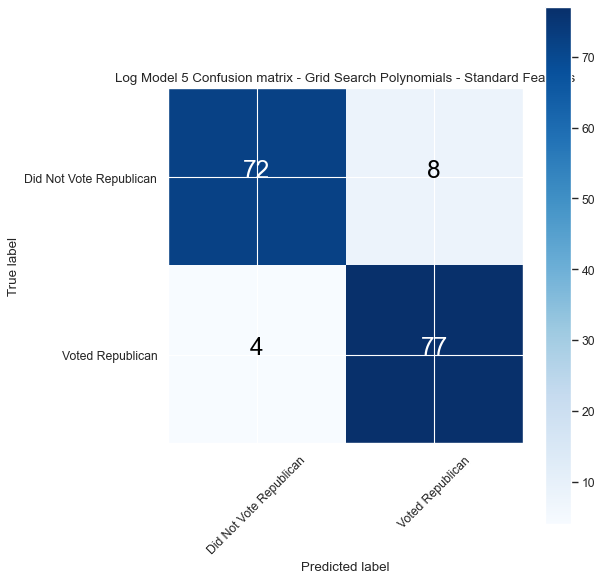

In [68]:
#View the confusion matrix
confusion_log_model_5 = metrics.confusion_matrix(y_test_log_model_5, y_pred_test_log_model_5)
plot_confusion_matrix(confusion_log_model_5, title='Log Model 5 Confusion matrix - Grid Search Polynomials - Standard Features')

In [69]:
#Run this code to save the model data
#make_pickle(log_model_5, 'log_model_5')

## 10. Logistic Model Grid Search On The Engineered Set- With Polynomials

In [70]:
#Splits the data for the polynomial logistic model gridsearch, using the engineered features
X_train_log_model_6, X_test_log_model_6, y_train_log_model_6, y_test_log_model_6 =  reset_data('engineered')

sc_log_model_6=StandardScaler()
X_train_scaled_log_model_6= sc_log_model_6.fit_transform(X_train_log_model_6)
X_test_scaled_log_model_6 = sc_log_model_6.transform(X_test_log_model_6)

In [71]:
log_model_6 = GridSearchCV(estimator=pipe_lr_poly, param_grid=grid_params_lr_poly, scoring='f1', cv=10)
#I've taken out the parameter 'verbose=5' to neaten up the notebook
log_model_6.fit(X_train_scaled_log_model_6, y_train_log_model_6)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                                       ('scl', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(random_state=42))]),
             param_grid=[{'clf__C': [1.0, 0.5, 0.1, 0.01],
                          'clf__penalty': ['l1', 'l2'],
                          'clf__solver': ['liblinear']}],
             scoring='f1')

In [72]:
#Loading the saved polynomial logistic model with pickle
#log_model_6_pkl = open('./Classification_Models_After_log_model_6.pkl', 'rb')
#log_model_6 = pickle.load(log_model_6_pkl)
#print("Loaded log_model_6 Pickle :: ", log_model_6)

In [73]:
# Best params
print('Best params: %s' % log_model_6.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % log_model_5.best_score_)
# Predict on test data with best params
y_pred_test_log_model_6 = log_model_6.predict(X_test_scaled_log_model_6)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.4f ' % f1_score(y_test_log_model_6, y_pred_test_log_model_6))

Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.894
Test set F1 score for best params: 0.8727 


In [74]:
#Make predictions for scoring purposes
y_pred_train_log_model_6 = log_model_6.predict(X_train_scaled_log_model_6)

# Prints the accuracy and f1 scores
print("Training Accuracy for Log Model 6 (GS Polynomials Engineered Features):", accuracy_score(y_train_log_model_6, y_pred_train_log_model_6))
print("Training F1 Score for Log Model 6 (GS Polynomials Engineered Features):", f1_score(y_train_log_model_6, y_pred_train_log_model_6))
print("")
print("Testing Accuracy for Log Model 6 (GS Polynomials Engineered Features):", accuracy_score(y_test_log_model_6, y_pred_test_log_model_6))
print("Testing F1 Score for Log Model 6 (GS Polynomials Engineered Features):", f1_score(y_test_log_model_6, y_pred_test_log_model_6))

Training Accuracy for Log Model 6 (GS Polynomials Engineered Features): 0.9393468118195957
Training F1 Score for Log Model 6 (GS Polynomials Engineered Features): 0.9409984871406959

Testing Accuracy for Log Model 6 (GS Polynomials Engineered Features): 0.8695652173913043
Testing F1 Score for Log Model 6 (GS Polynomials Engineered Features): 0.8727272727272727


Confusion Matrix


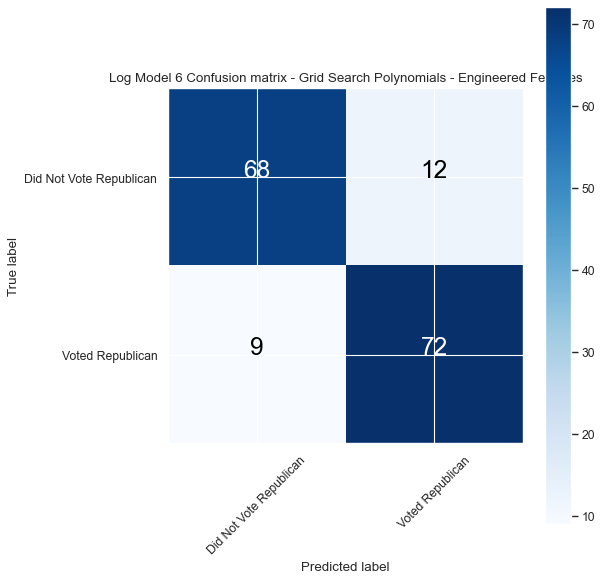

In [75]:
#View the confusion matrix
confusion_log_model_6 = metrics.confusion_matrix(y_test_log_model_6, y_pred_test_log_model_6)
plot_confusion_matrix(confusion_log_model_6, title='Log Model 6 Confusion matrix - Grid Search Polynomials - Engineered Features')

In [76]:
#Run this code to save the model data
#make_pickle(log_model_6, 'log_model_6')

## 11. KNN - Standard Set

In [77]:
#Splits the data for the KNN model gridsearch, using the standard features
X_train_KNN_model_1, X_test_KNN_model_1, y_train_KNN_model_1, y_test_KNN_model_1 =  reset_data()

sc_KNN_model_1=StandardScaler()
X_train_scaled_KNN_model_1= sc_KNN_model_1.fit_transform(X_train_KNN_model_1)
X_test_scaled_KNN_model_1 = sc_KNN_model_1.transform(X_test_KNN_model_1)

In [78]:
#Creates a pipeline of parameters for the KNN model
pipe_KNN_poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
            ('scl', StandardScaler()),
            ('knn', KNeighborsClassifier())])

In [79]:
#Creates parameters for the KNN model
neighbors= list(range(1,20,2))
grid_params_KNN = [{'knn__n_neighbors':neighbors, 'knn__weights': ['uniform', 'distance']}] 

In [80]:
#Creates the KNN model
KNN_model_1 = GridSearchCV(estimator=pipe_KNN_poly, param_grid=grid_params_KNN, scoring='f1',
                           cv=5)
#I've taken out the parameter 'verbose=5' to neaten up the notebook

In [81]:
#Fits the KNN model to the data
KNN_model_1.fit(X_train_scaled_KNN_model_1, y_train_KNN_model_1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                                       ('scl', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                               19],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='f1')

In [82]:
# Best params
print('Best params: %s' % KNN_model_1.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % KNN_model_1.best_score_)
# Predict on test data with best params
y_pred_test_KNN_model_1 = KNN_model_1.predict(X_test_scaled_KNN_model_1)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.4f ' % f1_score(y_test_KNN_model_1, y_pred_test_KNN_model_1))

Best params: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Best training accuracy: 0.829
Test set F1 score for best params: 0.8250 


In [83]:
# Make predictions for scoring purposes
y_pred_train_KNN_model_1 = KNN_model_1.predict(X_train_scaled_KNN_model_1)

# Prints the accuracy and f1 scores
print("Training Accuracy for KNN Model 1 (Standard Features):", accuracy_score(y_train_KNN_model_1, y_pred_train_KNN_model_1))
print("Training F1 Score for KNN Model 1 (Standard Features):", f1_score(y_train_KNN_model_1, y_pred_train_KNN_model_1))
print("")
print("Testing Accuracy for KNN Model 1 (Standard Features):", accuracy_score(y_test_KNN_model_1, y_pred_test_KNN_model_1))
print("Testing F1 Score for KNN Model 1 (Standard Features):", f1_score(y_test_KNN_model_1, y_pred_test_KNN_model_1))

Training Accuracy for KNN Model 1 (Standard Features): 1.0
Training F1 Score for KNN Model 1 (Standard Features): 1.0

Testing Accuracy for KNN Model 1 (Standard Features): 0.8260869565217391
Testing F1 Score for KNN Model 1 (Standard Features): 0.825


Confusion Matrix


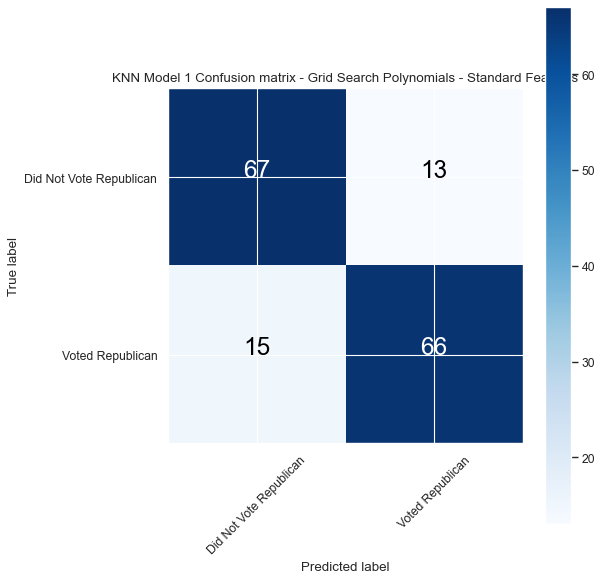

In [84]:
#Plots the confusion matrix
confusion_KNN_model_1 = metrics.confusion_matrix(y_test_KNN_model_1, y_pred_test_KNN_model_1)
plot_confusion_matrix(confusion_KNN_model_1, title='KNN Model 1 Confusion matrix - Grid Search Polynomials - Standard Features')

## 12. KNN - Engineered Features

In [85]:
#Splits the data for the KNN model gridsearch, using the engineered features
X_train_KNN_model_2, X_test_KNN_model_2, y_train_KNN_model_2, y_test_KNN_model_2 =  reset_data('engineered')

sc_KNN_model_2=StandardScaler()
X_train_scaled_KNN_model_2= sc_KNN_model_2.fit_transform(X_train_KNN_model_2)
X_test_scaled_KNN_model_2 = sc_KNN_model_2.transform(X_test_KNN_model_2)

In [86]:
#Creates the KNN model
KNN_model_2 = GridSearchCV(estimator=pipe_KNN_poly, param_grid=grid_params_KNN, scoring='f1',
                           cv=5)
#I've taken out the parameter 'verbose=5' to neaten up the notebook

In [87]:
#Fits the KNN model to the data
KNN_model_2.fit(X_train_scaled_KNN_model_2, y_train_KNN_model_2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                                       ('scl', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                               19],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='f1')

In [88]:
# Best params
print('Best params: %s' % KNN_model_2.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % KNN_model_2.best_score_)
# Predict on test data with best params
y_pred_test_KNN_model_2 = KNN_model_2.predict(X_test_scaled_KNN_model_2)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.4f ' % f1_score(y_test_KNN_model_2, y_pred_test_KNN_model_2))

Best params: {'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best training accuracy: 0.815
Test set F1 score for best params: 0.8304 


In [89]:
# Make predictions for scoring purposes
y_pred_train_KNN_model_2 = KNN_model_2.predict(X_train_scaled_KNN_model_2)

# Prints the accuracy and f1 scores
print("Training Accuracy for KNN Model 2 (Engineered Features):", accuracy_score(y_train_KNN_model_2, y_pred_train_KNN_model_2))
print("Training F1 Score for KNN Model 2 (Engineered Features):", f1_score(y_train_KNN_model_2, y_pred_train_KNN_model_2))
print("")
print("Testing Accuracy for KNN Model 2 (Engineered Features):", accuracy_score(y_test_KNN_model_2, y_pred_test_KNN_model_2))
print("Testing F1 Score for KNN Model 2 (Engineered Features):", f1_score(y_test_KNN_model_2, y_pred_test_KNN_model_2))

Training Accuracy for KNN Model 2 (Engineered Features): 1.0
Training F1 Score for KNN Model 2 (Engineered Features): 1.0

Testing Accuracy for KNN Model 2 (Engineered Features): 0.8198757763975155
Testing F1 Score for KNN Model 2 (Engineered Features): 0.8304093567251462


Confusion Matrix


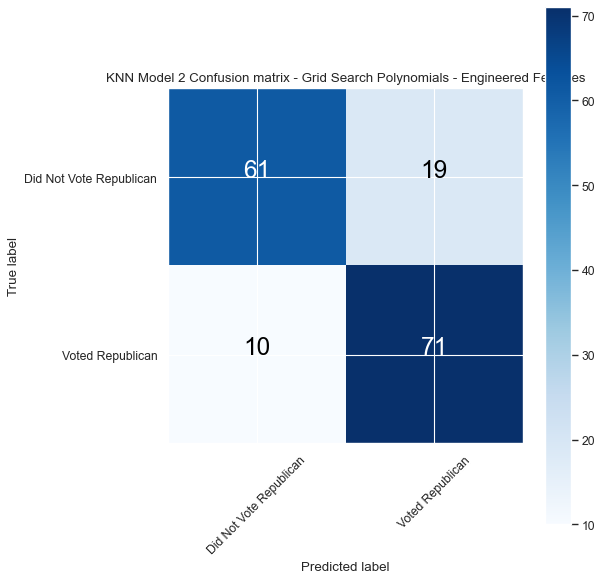

In [90]:
#Plots the confusin matrix
confusion_KNN_model_2 = metrics.confusion_matrix(y_test_KNN_model_2, y_pred_test_KNN_model_2)
plot_confusion_matrix(confusion_KNN_model_2, title='KNN Model 2 Confusion matrix - Grid Search Polynomials - Engineered Features')

## 13. A Function to Visualize Decision Trees

In [91]:
def plot_decision_tree(clf, feature_cols, class_titles, file_name):
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names = class_titles)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    
    #Uncomment the above line to save the file
    #graph.write_png(file_name + '.png')
    
    return Image(graph.create_png())

## 14. Decision Trees - Standard Set

In [92]:
#Splits the data for the decision tree model using the standard features
X_train_DT_model_1, X_test_DT_model_1, y_train_DT_model_1, y_test_DT_model_1 =  reset_data()

sc_DT_model_1=StandardScaler()
X_train_scaled_DT_model_1= sc_DT_model_1.fit_transform(X_train_DT_model_1)
X_test_scaled_DT_model_1 = sc_DT_model_1.transform(X_test_DT_model_1)

In [93]:
# Create Decision Tree classifer object
DT_model_1 = DecisionTreeClassifier()
# Train Decision Tree Classifer
DT_model_1 = DT_model_1.fit(X_train_scaled_DT_model_1, y_train_DT_model_1)

In [94]:
# Predict on training data with best params
y_pred_train_DT_model_1 = DT_model_1.predict(X_train_scaled_DT_model_1)

#Predict the response for test dataset
y_pred_test_DT_model_1 = DT_model_1.predict(X_test_scaled_DT_model_1)

# Prints the accuracy and f1 scores
print("Training Accuracy for Decision Tree Model 1 (Standard Features):", accuracy_score(y_train_DT_model_1, y_pred_train_DT_model_1))
print("Training F1 Score for Decision Tree Model 1 (Standard Features):", f1_score(y_train_DT_model_1, y_pred_train_DT_model_1))
print("")
print("Testing Accuracy for Decision Tree Model 1 (Standard Features):", accuracy_score(y_test_DT_model_1, y_pred_test_DT_model_1))
print("Testing F1 Score for Decision Tree Model 1 (Standard Features):", f1_score(y_test_DT_model_1, y_pred_test_DT_model_1))

Training Accuracy for Decision Tree Model 1 (Standard Features): 1.0
Training F1 Score for Decision Tree Model 1 (Standard Features): 1.0

Testing Accuracy for Decision Tree Model 1 (Standard Features): 0.7142857142857143
Testing F1 Score for Decision Tree Model 1 (Standard Features): 0.6933333333333332


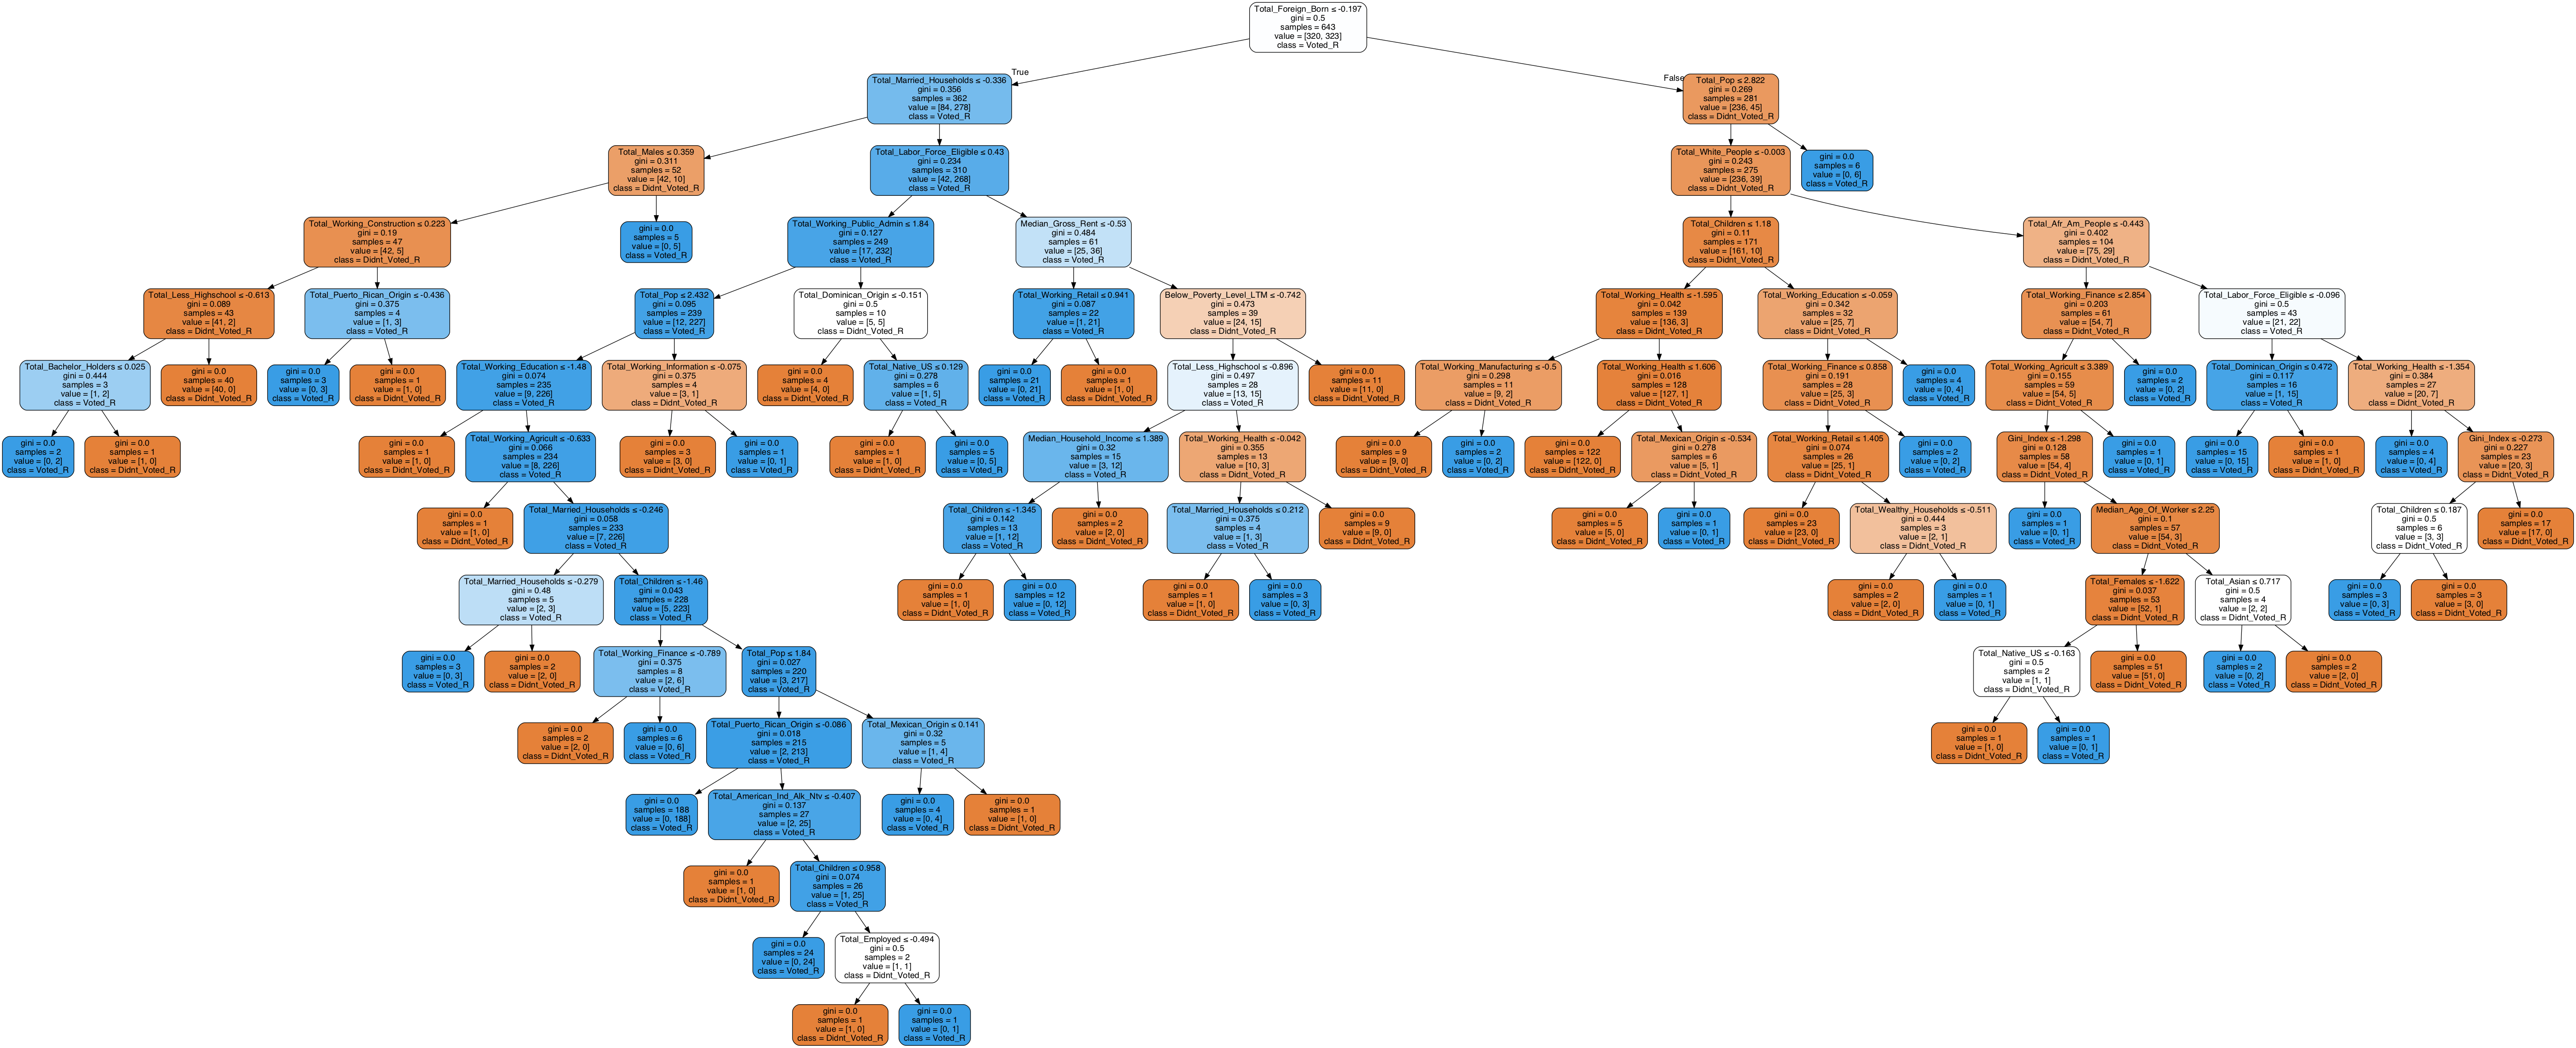

In [96]:
plot_decision_tree(DT_model_1, list(X_train_DT_model_1.columns), ['Didnt_Voted_R', 'Voted_R'], 'DT_model_1')

## 14. Decision Trees - Engineered Set


In [97]:
#Splits the data for the decision tree model using the engineered features
X_train_DT_model_2, X_test_DT_model_2, y_train_DT_model_2, y_test_DT_model_2 =  reset_data('engineered')

sc_DT_model_2=StandardScaler()
X_train_scaled_DT_model_2= sc_DT_model_2.fit_transform(X_train_DT_model_2)
X_test_scaled_DT_model_2 = sc_DT_model_2.transform(X_test_DT_model_2)

In [98]:
# Create Decision Tree classifer object
DT_model_2 = DecisionTreeClassifier()
# Train Decision Tree Classifer
DT_model_2 = DT_model_2.fit(X_train_scaled_DT_model_2, y_train_DT_model_2)

In [99]:
# Predict on training data with best params
y_pred_train_DT_model_2 = DT_model_2.predict(X_train_scaled_DT_model_2)

#Predict the response for test dataset
y_pred_test_DT_model_2 = DT_model_2.predict(X_test_scaled_DT_model_2)

# Prints the accuracy and f1 scores
print("Training Accuracy for Decision Tree Model 2 (Engineered Features):", accuracy_score(y_train_DT_model_2, y_pred_train_DT_model_2))
print("Training F1 Score for Decision Tree Model 2 (Engineered Features):", f1_score(y_train_DT_model_2, y_pred_train_DT_model_2))
print("")
print("Testing Accuracy for Decision Tree Model 2 (Engineered Features):", accuracy_score(y_test_DT_model_2, y_pred_test_DT_model_2))
print("Testing F1 Score for Decision Tree Model 2 (Engineered Features):", f1_score(y_test_DT_model_2, y_pred_test_DT_model_2))

Training Accuracy for Decision Tree Model 2 (Engineered Features): 1.0
Training F1 Score for Decision Tree Model 2 (Engineered Features): 1.0

Testing Accuracy for Decision Tree Model 2 (Engineered Features): 0.782608695652174
Testing F1 Score for Decision Tree Model 2 (Engineered Features): 0.7770700636942676


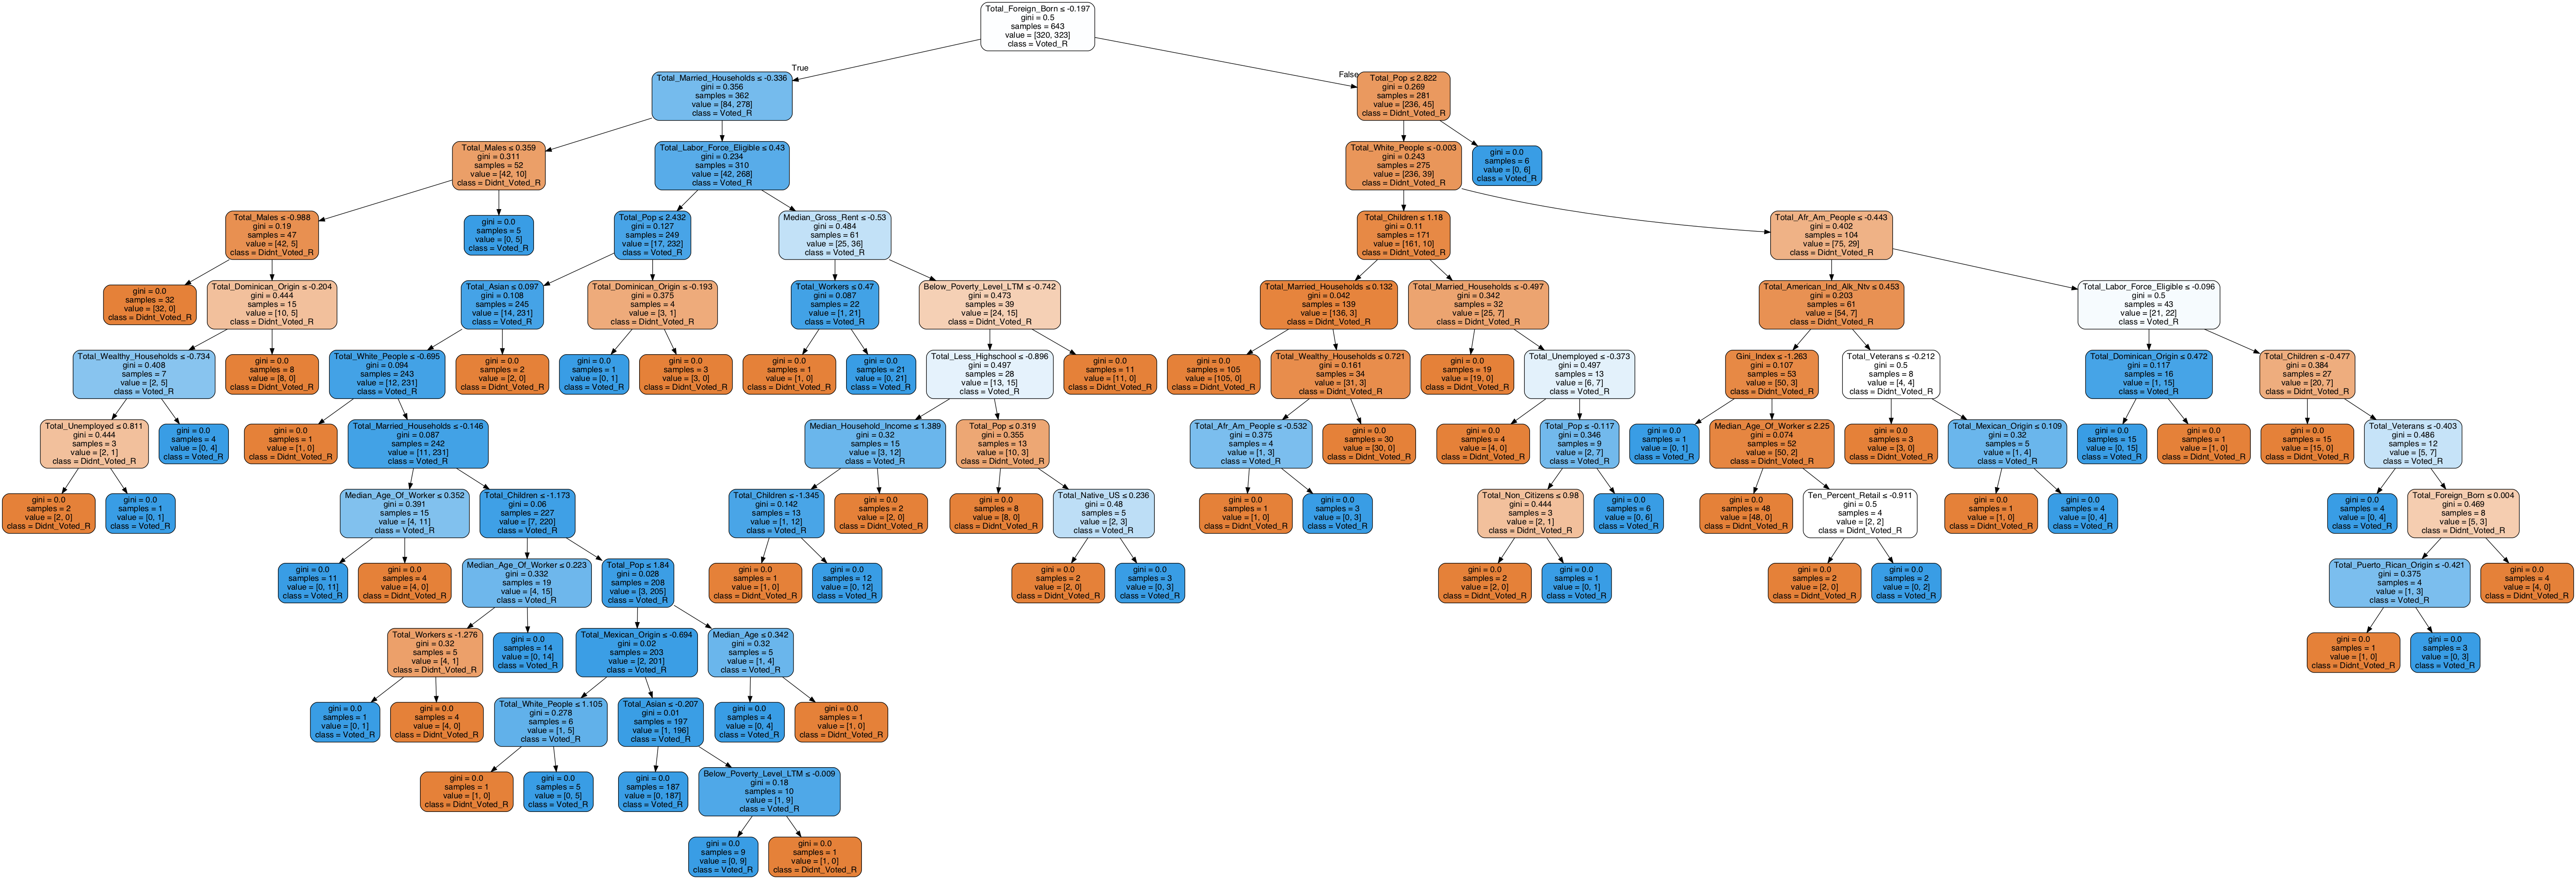

In [100]:
plot_decision_tree(DT_model_2, list(X_train_DT_model_2.columns), ['Didnt_Voted_R', 'Voted_R'], 'DT_model_2')

## 15. Decision Trees - Grid Search - Standard Set

In [101]:
#Splits the data for the decision tree model gridsearch, using the standard features
X_train_DT_model_3, X_test_DT_model_3, y_train_DT_model_3, y_test_DT_model_3 =  reset_data()

sc_DT_model_3=StandardScaler()
X_train_scaled_DT_model_3= sc_DT_model_3.fit_transform(X_train_DT_model_3)
X_test_scaled_DT_model_3 = sc_DT_model_3.transform(X_test_DT_model_3)

In [102]:
# The scorers used in the gridsearch to find the best parameters
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

In [103]:
#Parameters and model creation
parameters ={'criterion': ['gini','entropy'], 'min_samples_leaf' : range(5,100,15), 'max_depth': range(2,20,1)}

DT_model_3 = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid= parameters,
                  scoring=scoring, cv=5, refit='AUC', return_train_score=True)
#I've taken out the parameter 'verbose=5' to neaten up the notebook


In [104]:
DT_model_3.fit(X_train_scaled_DT_model_3, y_train_DT_model_3)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(5, 100, 15)},
             refit='AUC', return_train_score=True,
             scoring={'AUC': 'roc_auc',
                      'Accuracy': make_scorer(accuracy_score)})

In [105]:
# Predict on training data with best params
y_pred_train_DT_model_3 = DT_model_3.predict(X_train_scaled_DT_model_3)

#Predict the response for test dataset
y_pred_test_DT_model_3 = DT_model_3.predict(X_test_scaled_DT_model_3)

# Prints the accuracy and f1 scores
print("Training Accuracy for Decision Tree Model 3 GS (Standard Features):", accuracy_score(y_train_DT_model_3, y_pred_train_DT_model_3))
print("Training F1 Score for Decision Tree Model 3 GS (Standard Features):", f1_score(y_train_DT_model_3, y_pred_train_DT_model_3))
print("")
print("Testing Accuracy for Decision Tree Model 3 GS (Standard Features):", accuracy_score(y_test_DT_model_3, y_pred_test_DT_model_3))
print("Testing F1 Score for Decision Tree Model 3 GS (Standard Features):", f1_score(y_test_DT_model_3, y_pred_test_DT_model_3))

Training Accuracy for Decision Tree Model 3 GS (Standard Features): 0.8631415241057543
Training F1 Score for Decision Tree Model 3 GS (Standard Features): 0.8518518518518519

Testing Accuracy for Decision Tree Model 3 GS (Standard Features): 0.782608695652174
Testing F1 Score for Decision Tree Model 3 GS (Standard Features): 0.7482014388489209


In [106]:
print('The top score for a decision tree is: ' + str(DT_model_3.best_score_))
print('The parameters for the top performing decision tree is: ' + str(DT_model_3.best_params_))
print('The top performing decision tree is: ')
print(DT_model_3.best_estimator_)

The top score for a decision tree is: 0.8977768179086538
The parameters for the top performing decision tree is: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 35}
The top performing decision tree is: 
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=35,
                       random_state=42)


In [107]:
DT_model_3.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'params', 'split0_test_AUC', 'split1_test_AUC', 'split2_test_AUC', 'split3_test_AUC', 'split4_test_AUC', 'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC', 'split0_train_AUC', 'split1_train_AUC', 'split2_train_AUC', 'split3_train_AUC', 'split4_train_AUC', 'mean_train_AUC', 'std_train_AUC', 'split0_test_Accuracy', 'split1_test_Accuracy', 'split2_test_Accuracy', 'split3_test_Accuracy', 'split4_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy', 'rank_test_Accuracy', 'split0_train_Accuracy', 'split1_train_Accuracy', 'split2_train_Accuracy', 'split3_train_Accuracy', 'split4_train_Accuracy', 'mean_train_Accuracy', 'std_train_Accuracy'])

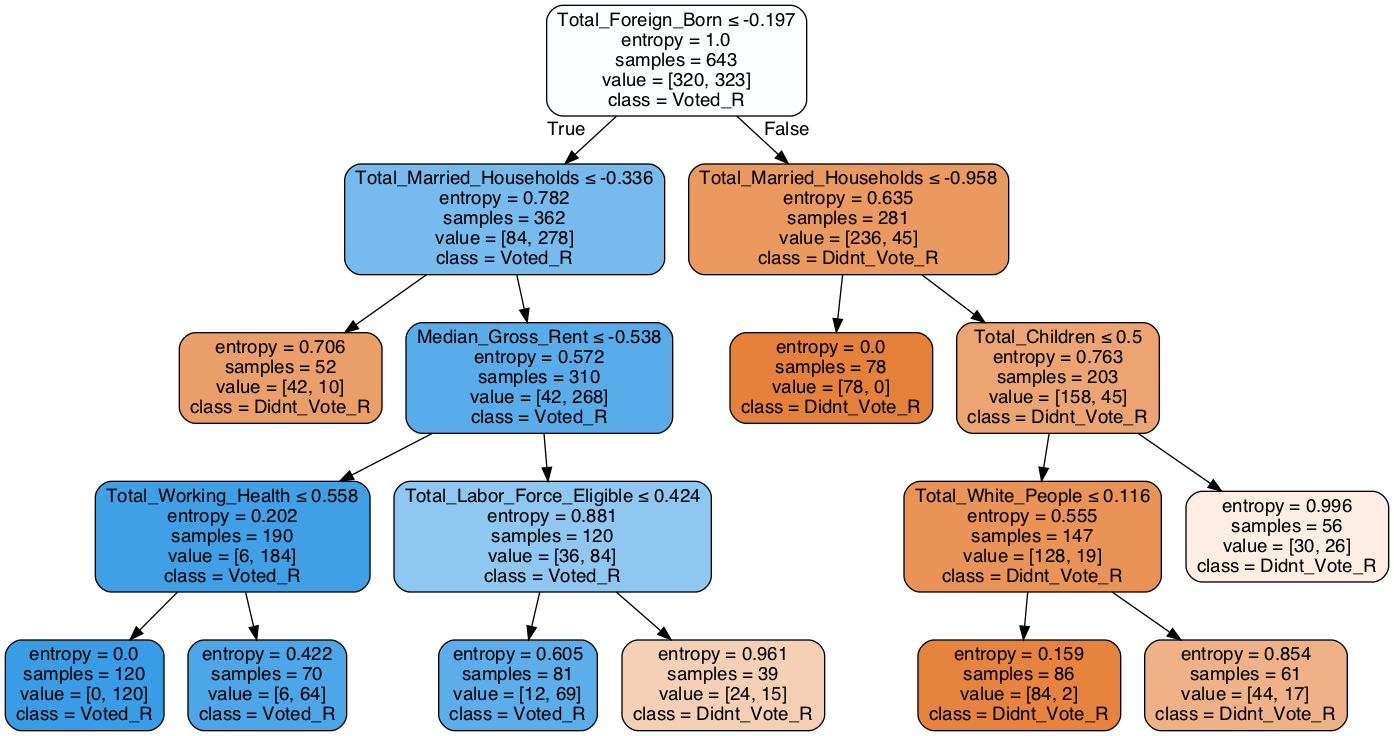

In [108]:
plot_decision_tree(DT_model_3.best_estimator_, list(X_train_DT_model_3.columns), ['Didnt_Vote_R', 'Voted_R'], 'DT_model_3')

## 16. Decision Trees - Grid Search - Engineered Set

In [109]:
#Splits the data for the decision tree model gridsearch, using the engineered features
X_train_DT_model_4, X_test_DT_model_4, y_train_DT_model_4, y_test_DT_model_4 =  reset_data('engineered')

sc_DT_model_4=StandardScaler()
X_train_scaled_DT_model_4= sc_DT_model_4.fit_transform(X_train_DT_model_4)
X_test_scaled_DT_model_4 = sc_DT_model_4.transform(X_test_DT_model_4)

In [110]:
#Parameters and model creation
parameters ={'criterion': ['gini','entropy'], 'min_samples_leaf' : range(5,100,15), 'max_depth': range(2,20,1)}

DT_model_4 = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid= parameters,
                  scoring=scoring, cv=5, refit='AUC', return_train_score=True)
#I've taken out the parameter 'verbose=5' to neaten up the notebook

In [111]:
DT_model_4.fit(X_train_scaled_DT_model_4, y_train_DT_model_4)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(5, 100, 15)},
             refit='AUC', return_train_score=True,
             scoring={'AUC': 'roc_auc',
                      'Accuracy': make_scorer(accuracy_score)})

In [112]:
# Predict on training data with best params
y_pred_train_DT_model_4 = DT_model_4.predict(X_train_scaled_DT_model_4)

#Predict the response for test dataset
y_pred_test_DT_model_4 = DT_model_4.predict(X_test_scaled_DT_model_4)

# Prints the accuracy and f1 scores
print("Training Accuracy for Decision Tree Model 4 GS (Engineered Features):", accuracy_score(y_train_DT_model_4, y_pred_train_DT_model_4))
print("Training F1 Score for Decision Tree Model 4 GS (Engineered Features):", f1_score(y_train_DT_model_4, y_pred_train_DT_model_4))
print("")
print("Testing Accuracy for Decision Tree Model 4 GS (Engineered Features):", accuracy_score(y_test_DT_model_4, y_pred_test_DT_model_4))
print("Testing F1 Score for Decision Tree Model 4 GS (Engineered Features):", f1_score(y_test_DT_model_4, y_pred_test_DT_model_4))

Training Accuracy for Decision Tree Model 4 GS (Engineered Features): 0.8631415241057543
Training F1 Score for Decision Tree Model 4 GS (Engineered Features): 0.8518518518518519

Testing Accuracy for Decision Tree Model 4 GS (Engineered Features): 0.782608695652174
Testing F1 Score for Decision Tree Model 4 GS (Engineered Features): 0.7482014388489209


In [113]:
print('The top score for a decision tree is: ' + str(DT_model_4.best_score_))
print('The parameters for the top performing decision tree is: ' + str(DT_model_4.best_params_))
print('The top performing decision tree is: ')
print(DT_model_4.best_estimator_)

The top score for a decision tree is: 0.8970977313701922
The parameters for the top performing decision tree is: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 35}
The top performing decision tree is: 
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=35,
                       random_state=42)


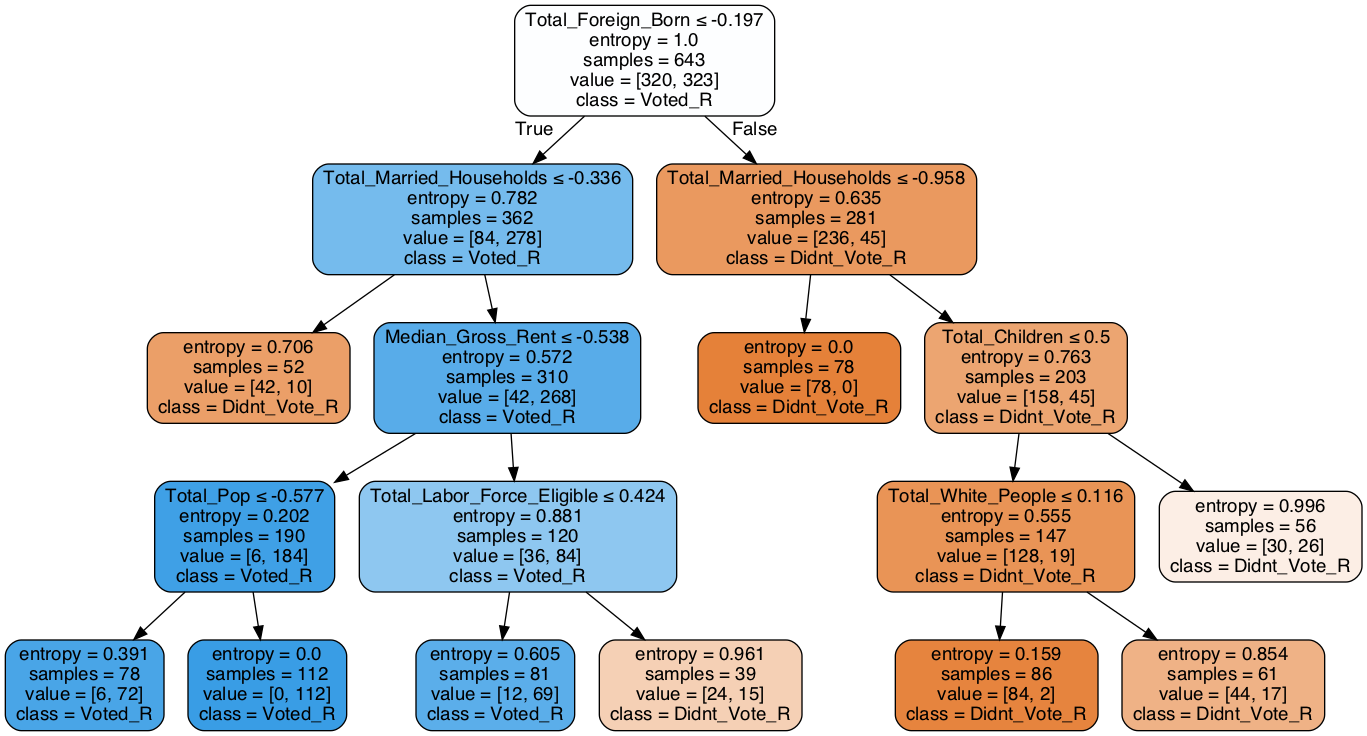

In [114]:
plot_decision_tree(DT_model_4.best_estimator_, list(X_train_DT_model_4.columns), ['Didnt_Vote_R', 'Voted_R'], 'DT_model_4')

## 17. Random Forest - Standard Set

In [115]:
#Creates the parameters for the random forest model
param_grid = { 
    'n_estimators': [200,300,400],
    'max_features': [0.25, 0.33, 0.5 ],
    'max_depth' : [5,6,7,8,9],
    'min_samples_leaf': [0.03,0.04,0.05,0.06]
}

In [116]:
#Splits the data for the random forest model using the standard features
X_train_rfc_model_1, X_test_rfc_model_1, y_train_rfc_model_1, y_test_rfc_model_1 =  reset_data()

sc_rfc_model_1=StandardScaler()
X_train_scaled_rfc_model_1= sc_rfc_model_1.fit_transform(X_train_rfc_model_1)
X_test_scaled_rfc_model_1 = sc_rfc_model_1.transform(X_test_rfc_model_1)

In [117]:
#Fits the rf model
rfc_model_1 = GridSearchCV(estimator= RandomForestClassifier(random_state = 23), param_grid=param_grid, cv= 5, n_jobs=-1)
#I've taken out the parameter 'verbose=5' to neaten up the notebook
rfc_model_1.fit(X_train_scaled_rfc_model_1, y_train_rfc_model_1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'max_features': [0.25, 0.33, 0.5],
                         'min_samples_leaf': [0.03, 0.04, 0.05, 0.06],
                         'n_estimators': [200, 300, 400]})

In [118]:
#Loading the saved random forest model with pickle
#rfc_model_1_pkl = open('./Classification_Models_After_rfc_model_1.pkl', 'rb')
#rfc_model_1 = pickle.load(rfc_model_1_pkl)
#print("Loaded rfc_model_1 Pickle :: ", rfc_model_1)
#print(rfc_model_1.best_estimator_.get_params())

In [119]:
# Predict on training data with best params
pred_rfc_model_1_train = rfc_model_1.predict(X_train_scaled_rfc_model_1)
#Predict the response for test dataset
pred_rfc_model_1 = rfc_model_1.predict(X_test_scaled_rfc_model_1)

In [120]:
# Prints the accuracy and f1 scores
print("Training Accuracy for Random Forest Model 1 (Standard Features):", accuracy_score(y_train_rfc_model_1, pred_rfc_model_1_train))
print("Training F1 Score for Random Forest Model 1 (Standard Features):", f1_score(y_train_rfc_model_1, pred_rfc_model_1_train))
print("")
print("Testing Accuracy for Random Forest Model 1 (Standard Features):", accuracy_score(y_test_rfc_model_1, pred_rfc_model_1))
print("Testing F1 Score for Random Forest Model 1 (Standard Features):", f1_score(y_test_rfc_model_1, pred_rfc_model_1))

Training Accuracy for Random Forest Model 1 (Standard Features): 0.8771384136858476
Training F1 Score for Random Forest Model 1 (Standard Features): 0.8778979907264297

Testing Accuracy for Random Forest Model 1 (Standard Features): 0.8136645962732919
Testing F1 Score for Random Forest Model 1 (Standard Features): 0.8026315789473684


In [121]:
print('The top score for a random forest is: ' + str(rfc_model_1.best_score_))
print('The parameters for the top performing random forest is: ' + str(rfc_model_1.best_params_))
print('The top performing random forest is: ')
print(rfc_model_1.best_estimator_)

The top score for a random forest is: 0.8584302325581395
The parameters for the top performing random forest is: {'max_depth': 6, 'max_features': 0.25, 'min_samples_leaf': 0.03, 'n_estimators': 200}
The top performing random forest is: 
RandomForestClassifier(max_depth=6, max_features=0.25, min_samples_leaf=0.03,
                       n_estimators=200, random_state=23)


In [122]:
#Run this code to save the random forest model data
#make_pickle(rfc_model_1, 'rfc_model_1')

## 18. Random Forest - Engineered Set

In [123]:
#Splits the data for the random forest model using the engineered features
X_train_rfc_model_2, X_test_rfc_model_2, y_train_rfc_model_2, y_test_rfc_model_2 =  reset_data('engineered')

sc_rfc_model_2=StandardScaler()
X_train_scaled_rfc_model_2= sc_rfc_model_2.fit_transform(X_train_rfc_model_2)
X_test_scaled_rfc_model_2 = sc_rfc_model_2.transform(X_test_rfc_model_2)

In [124]:
#Fits the rf model
rfc_model_2 = GridSearchCV(estimator= RandomForestClassifier(random_state = 23), param_grid=param_grid, cv= 5, n_jobs=-1)
#I've taken out the parameter 'verbose=5' to neaten up the notebook
rfc_model_2.fit(X_train_scaled_rfc_model_2, y_train_rfc_model_2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'max_features': [0.25, 0.33, 0.5],
                         'min_samples_leaf': [0.03, 0.04, 0.05, 0.06],
                         'n_estimators': [200, 300, 400]})

In [125]:
#Loading the saved random forest smote model with pickle
#rfc_model_2_pkl = open('./Classification_Models_After_rfc_model_2.pkl', 'rb')
#rfc_model_2 = pickle.load(rfc_model_2_pkl)
#print("Loaded rfc_model_2 Pickle :: ", rfc_model_2)
#print(rfc_model_2.best_estimator_.get_params())

In [126]:
# Predict on training data with best params
pred_rfc_model_2_train = rfc_model_2.predict(X_train_scaled_rfc_model_2)
#Predict the response for test dataset
pred_rfc_model_2 = rfc_model_2.predict(X_test_scaled_rfc_model_2)

In [127]:
# Prints the accuracy and f1 scores
print("Training Accuracy for Random Forest Model 2 (Engineered Features):", accuracy_score(y_train_rfc_model_2, pred_rfc_model_2_train))
print("Training F1 Score for Random Forest Model 2 (Engineered Features):", f1_score(y_train_rfc_model_2, pred_rfc_model_2_train))
print("")
print("Testing Accuracy for Random Forest Model 2 (Engineered Features):", accuracy_score(y_test_rfc_model_2, pred_rfc_model_2))
print("Testing F1 Score for Random Forest Model 2 (Engineered Features):", f1_score(y_test_rfc_model_2, pred_rfc_model_2))

Training Accuracy for Random Forest Model 2 (Engineered Features): 0.8755832037325039
Training F1 Score for Random Forest Model 2 (Engineered Features): 0.8753894080996886

Testing Accuracy for Random Forest Model 2 (Engineered Features): 0.8074534161490683
Testing F1 Score for Random Forest Model 2 (Engineered Features): 0.794701986754967


In [128]:
print('The top score for a random forest is: ' + str(rfc_model_2.best_score_))
print('The parameters for the top performing random forest is: ' + str(rfc_model_2.best_params_))
print('The top performing random forest is: ')
print(rfc_model_2.best_estimator_)

The top score for a random forest is: 0.8522286821705427
The parameters for the top performing random forest is: {'max_depth': 5, 'max_features': 0.25, 'min_samples_leaf': 0.03, 'n_estimators': 200}
The top performing random forest is: 
RandomForestClassifier(max_depth=5, max_features=0.25, min_samples_leaf=0.03,
                       n_estimators=200, random_state=23)


In [129]:
#Run this code to save the random forest model data
#make_pickle(rfc_model_2, 'rfc_model_2')

## 19. XGBoost - Standard Set

In [120]:

X_train_xgb_model_1, X_test_xgb_model_1, y_train_xgb_model_1, y_test_xgb_model_1 =  reset_data()

sc_xgb_model_1 = StandardScaler()
X_train_scaled_xgb_model_1= sc_xgb_model_1.fit_transform(X_train_xgb_model_1)
X_test_scaled_xgb_model_1 = sc_xgb_model_1.transform(X_test_xgb_model_1)

In [121]:
#fits and then scores the XGBoost model
xgb_model_1 = xgb.XGBClassifier()
xgb_model_1.fit(X_train_scaled_xgb_model_1, y_train_xgb_model_1)

training_preds_xgb_model_1 = xgb_model_1.predict(X_train_scaled_xgb_model_1)
val_preds_xgb_model_1 = xgb_model_1.predict(X_test_scaled_xgb_model_1)

training_accuracy_xgb_model_1 = accuracy_score(y_train_xgb_model_1, training_preds_xgb_model_1)
val_accuracy_xgb_model_1 = accuracy_score(y_test_xgb_model_1, val_preds_xgb_model_1)

print("Training Accuracy for the standard model: {:.4}%".format(training_accuracy_xgb_model_1 * 100))
print("Validation Accuracy for the standard model: {:.4}%".format(val_accuracy_xgb_model_1 * 100))

Training Accuracy for the standard model: 98.11%
Validation Accuracy for the standard model: 83.14%


In [122]:
#Creates a parameter grid for the gridsearch of XGBoost
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [123]:
#Creates an XGBoost model
xgb_model_1 = xgb.XGBClassifier()

In [124]:
#Fits the data to the model
xgb_model_1 = GridSearchCV(xgb_model_1, param_grid, scoring='accuracy', cv=None, n_jobs=1)
#I've taken out the parameter 'verbose=5' to neaten up the notebook
xgb_model_1.fit(X_train_scaled_xgb_model_1, y_train_xgb_model_1)

GridSearchCV(cv=None, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'learning_rate': [0.1], 'max_depth': [6], 'min_child_weight': [10], 'subsample': [0.7], 'n_estimators': [5, 30, 100, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [125]:
#Prints the best parameters from the XGBoost model
best_parameters_xgb_model_1 = xgb_model_1.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters_xgb_model_1.keys()):
    print("%s: %r" % (param_name, best_parameters_xgb_model_1[param_name]))

training_preds_xgb_model_1 = xgb_model_1.predict(X_train_scaled_xgb_model_1)
val_preds_xgb_model_1 = xgb_model_1.predict(X_test_scaled_xgb_model_1)
training_accuracy_xgb_model_1 = accuracy_score(y_train_xgb_model_1, training_preds_xgb_model_1)
val_accuracy_xgb_model_1 = accuracy_score(y_test_xgb_model_1, val_preds_xgb_model_1)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy_xgb_model_1 * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy_xgb_model_1 * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 100
subsample: 0.7

Training Accuracy: 93.75%
Validation accuracy: 83.14%


In [126]:
#Makes predictions for model scoring
y_pred_train_xgb_model_1 = xgb_model_1.predict(X_train_scaled_xgb_model_1)
y_pred_test_xgb_model_1 = xgb_model_1.predict(X_test_scaled_xgb_model_1)

# Prints the accuracy and f1 scores
print('Training Accuracy for XGBoost Model 1 (Standard Features): %.4f ' % accuracy_score(y_train_xgb_model_1, y_pred_train_xgb_model_1))
print('Training F1 Score for XGBoost Model 1 (Standard Features): %.4f ' % f1_score(y_train_xgb_model_1, y_pred_train_xgb_model_1))
print('')
print('Testing Accuracy for XGBoost Model 1 (Standard Features): %.4f ' % accuracy_score(y_test_xgb_model_1, y_pred_test_xgb_model_1))
print('Testing F1 Score for XGBoost Model 1 (Standard Features): %.4f ' % f1_score(y_test_xgb_model_1, y_pred_test_xgb_model_1))

Training Accuracy for XGBoost Model 1 (Standard Features): 0.9375 
Training F1 Score for XGBoost Model 1 (Standard Features): 0.9387 

Testing Accuracy for XGBoost Model 1 (Standard Features): 0.8314 
Testing F1 Score for XGBoost Model 1 (Standard Features): 0.8380 


## 20. XGBoost - Engineered Set

In [127]:
X_train_xgb_model_2, X_test_xgb_model_2, y_train_xgb_model_2, y_test_xgb_model_2 =  reset_data('engineered')

sc_xgb_model_2 = StandardScaler()
X_train_scaled_xgb_model_2= sc_xgb_model_2.fit_transform(X_train_xgb_model_2)
X_test_scaled_xgb_model_2 = sc_xgb_model_2.transform(X_test_xgb_model_2)

In [128]:
#fits and then scores the XGBoost model
xgb_model_2 = xgb.XGBClassifier()
xgb_model_2.fit(X_train_scaled_xgb_model_2, y_train_xgb_model_2)

training_preds_xgb_model_2 = xgb_model_2.predict(X_train_scaled_xgb_model_2)
val_preds_xgb_model_2 = xgb_model_2.predict(X_test_scaled_xgb_model_2)

training_accuracy_xgb_model_2 = accuracy_score(y_train_xgb_model_2, training_preds_xgb_model_2)
val_accuracy_xgb_model_2 = accuracy_score(y_test_xgb_model_2, val_preds_xgb_model_2)

print("Training Accuracy for the standard model: {:.4}%".format(training_accuracy_xgb_model_2 * 100))
print("Validation Accuracy for the standard model: {:.4}%".format(val_accuracy_xgb_model_2 * 100))

Training Accuracy for the standard model: 97.24%
Validation Accuracy for the standard model: 81.98%


In [129]:
#Creates an XGBoost model
xgb_model_2 = xgb.XGBClassifier()

In [130]:
#Fits the data to the model
xgb_model_2 = GridSearchCV(xgb_model_2, param_grid, scoring='accuracy', cv=None, n_jobs=1)
#I've taken out the parameter 'verbose=5' to neaten up the notebook
xgb_model_2.fit(X_train_scaled_xgb_model_2, y_train_xgb_model_2)

GridSearchCV(cv=None, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'learning_rate': [0.1], 'max_depth': [6], 'min_child_weight': [10], 'subsample': [0.7], 'n_estimators': [5, 30, 100, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [131]:
#Prints the best parameters from the XGBoost model
best_parameters_xgb_model_2 = xgb_model_2.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters_xgb_model_2.keys()):
    print("%s: %r" % (param_name, best_parameters_xgb_model_2[param_name]))

training_preds_xgb_model_2 = xgb_model_2.predict(X_train_scaled_xgb_model_2)
val_preds_xgb_model_2 = xgb_model_2.predict(X_test_scaled_xgb_model_2)
training_accuracy_xgb_model_2 = accuracy_score(y_train_xgb_model_2, training_preds_xgb_model_2)
val_accuracy_xgb_model_2 = accuracy_score(y_test_xgb_model_2, val_preds_xgb_model_2)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy_xgb_model_2 * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy_xgb_model_2 * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 100
subsample: 0.7

Training Accuracy: 92.88%
Validation accuracy: 82.56%


In [132]:
#Makes predictions for model scoring
y_pred_train_xgb_model_2 = xgb_model_2.predict(X_train_scaled_xgb_model_2)
y_pred_test_xgb_model_2 = xgb_model_2.predict(X_test_scaled_xgb_model_2)

# Prints the accuracy and f1 scores
print('Training Accuracy for XGBoost Model 2 (Standard Features): %.4f ' % accuracy_score(y_train_xgb_model_2, y_pred_train_xgb_model_2))
print('Training F1 Score for XGBoost Model 2 (Standard Features): %.4f ' % f1_score(y_train_xgb_model_2, y_pred_train_xgb_model_2))
print('')
print('Testing Accuracy for XGBoost Model 2 (Standard Features): %.4f ' % accuracy_score(y_test_xgb_model_2, y_pred_test_xgb_model_2))
print('Testing F1 Score for XGBoost Model 2 (Standard Features): %.4f ' % f1_score(y_test_xgb_model_2, y_pred_test_xgb_model_2))

Training Accuracy for XGBoost Model 2 (Standard Features): 0.9288 
Training F1 Score for XGBoost Model 2 (Standard Features): 0.9301 

Testing Accuracy for XGBoost Model 2 (Standard Features): 0.8256 
Testing F1 Score for XGBoost Model 2 (Standard Features): 0.8333 
